# Introduction

This notebook contains other sections of code and analysis that were done after submission of the ARAUS dataset paper, or that were not included in the paper to keep the discussion focused. Sections with top-level headers may be run individually, or you may run the notebook from start to finish as well. The sections with top-level headers are:

# Additional plots of changes by masker (sorted by name)

In this section, we make plots for the mean changes in ISO Pleasantness and ISO Eventfulness, with the x-axis being the masker name sorted in alphabetical order. Since the masker names follow the class names, this conveniently groups them by class as well.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from araus_utils import plot_changes_by_masker

## Load & process relevant data for analysis

In [4]:
metadata_dir = os.path.join('..','data') # Folder containing all the metadata files; edit as necessary for your system.
maskers = pd.read_csv(os.path.join(f'{metadata_dir}','maskers.csv'))
soundscapes = pd.read_csv(os.path.join(f'{metadata_dir}','soundscapes.csv'))
responses = pd.read_csv(os.path.join(f'{metadata_dir}','responses.csv'), dtype = {'participant':str})

We extract out only the 25440 relevant responses (those that are not attention, calibration or practice stimuli) for analysis.

In [5]:
responses_relevant = responses[responses['fold_r'] != -1]

We first compute the mean ISO Pleasantness values for each (soundscape, masker) pair and note down the masker class.

In [6]:
attributes = ['pleasant', 'eventful', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'monotonous'] # Define attributes to extract from dataframes
ISOPl_weights = [1,0,-np.sqrt(2)/2,np.sqrt(2)/2, 0, np.sqrt(2)/2,-1,-np.sqrt(2)/2] # Define weights for each attribute in attributes in computation of ISO Pleasantness
ISOPls = ((responses_relevant[attributes] * ISOPl_weights).sum(axis=1)/(4+np.sqrt(32))).values

if 'ISOPl' not in responses_relevant.columns:
    responses_relevant.insert(loc=responses_relevant.shape[1],column='ISOPl',value=ISOPls)

In [7]:
ISOPls_df = responses_relevant.groupby(['soundscape','masker']).mean()['ISOPl'].to_frame().join(maskers.set_index('masker')['class']).reset_index('masker')
ISOPls_by_soundscape = ISOPls_df.join(ISOPls_df[ISOPls_df['class'] == 'silence'], lsuffix = '', rsuffix = '_ref')
ISOPls_by_soundscape['ISOPl_delta'] = ISOPls_by_soundscape['ISOPl']-ISOPls_by_soundscape['ISOPl_ref']
ISOPls_by_masker = ISOPls_by_soundscape.groupby(['masker','class']).mean()

Then, we compute the mean ISO Eventfulness values for each (soundscape, masker) pair and note down the masker class.

In [8]:
attributes = ['pleasant', 'eventful', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'monotonous'] # Define attributes to extract from dataframes
ISOEv_weights = [0,1, np.sqrt(2)/2,np.sqrt(2)/2,-1,-np.sqrt(2)/2, 0,-np.sqrt(2)/2] # Define weights for each attribute in attributes in computation of ISO Eventfulness
ISOEvs = ((responses_relevant[attributes] * ISOEv_weights).sum(axis=1)/(4+np.sqrt(32))).values
if 'ISOEv' not in responses_relevant.columns:
    responses_relevant.insert(loc=responses_relevant.shape[1],column='ISOEv',value=ISOEvs)

In [9]:
ISOEvs_df = responses_relevant.groupby(['soundscape','masker']).mean()['ISOEv'].to_frame().join(maskers.set_index('masker')['class']).reset_index('masker')
ISOEvs_by_soundscape = ISOEvs_df.join(ISOEvs_df[ISOEvs_df['class'] == 'silence'], lsuffix = '', rsuffix = '_ref')
ISOEvs_by_soundscape['ISOEv_delta'] = ISOEvs_by_soundscape['ISOEv']-ISOEvs_by_soundscape['ISOEv_ref']
ISOEvs_by_masker = ISOEvs_by_soundscape.groupby(['masker','class']).mean()

## Make plots

Lastly, we make the plots as desired, for changes in ISO Pleasantness and ISO Eventfulness (i.e., their deltas) averaged across soundscape and SMR, and in the form of line plots and box plots. Note that the classes of maskers are separated by solid red lines, and within each class, the maskers used for the cross-validation set and the test set are separated by dotted green lines. The maskers are sorted in alphabetical order by their filename.

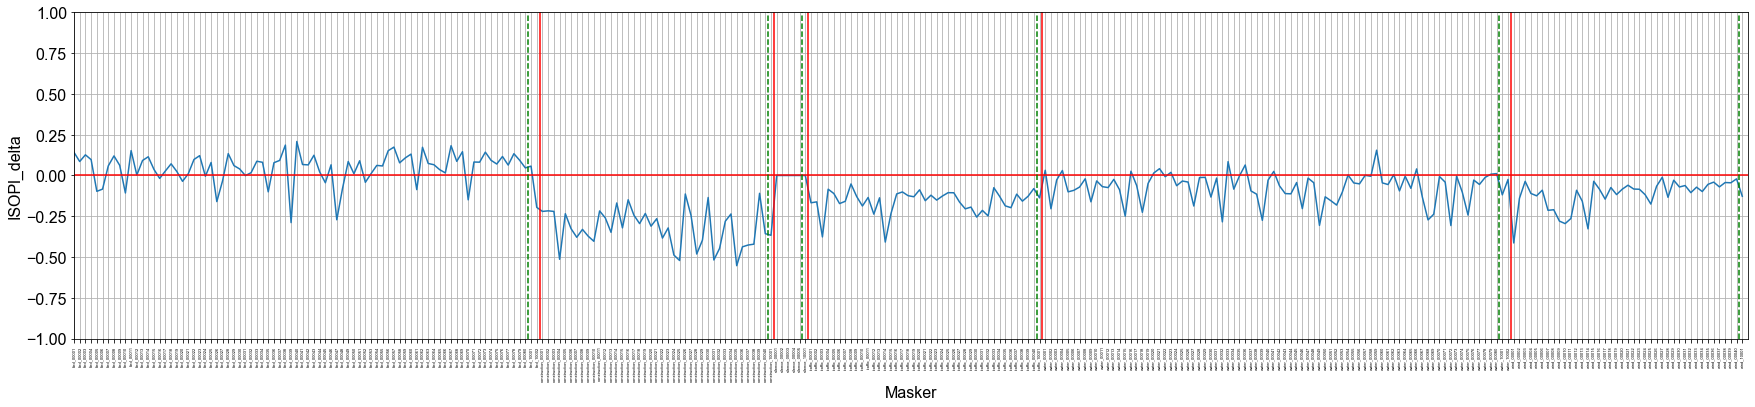

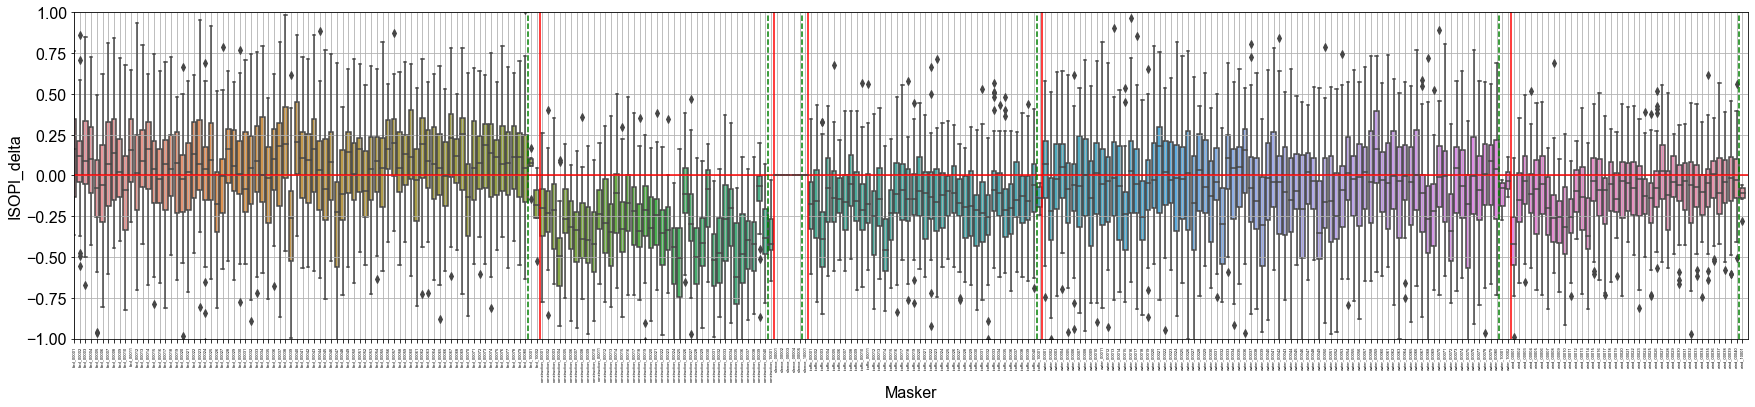

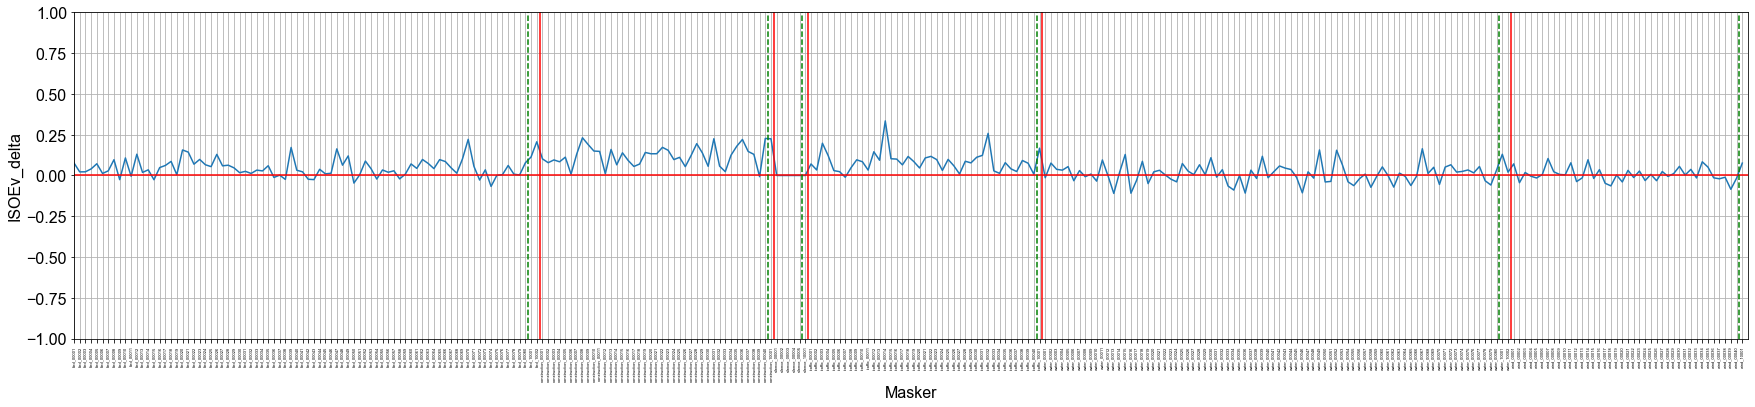

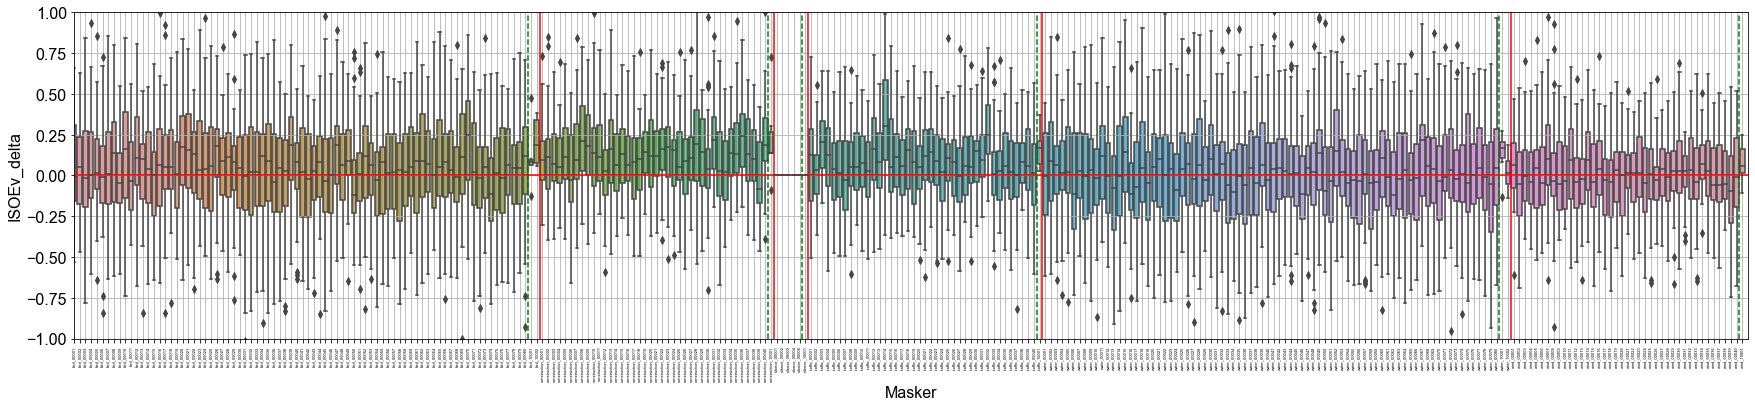

In [11]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'
for attribute_df_by_masker, attribute_df_by_soundscape, attribute in zip([ISOPls_by_masker, ISOEvs_by_masker],
                                                                         [ISOPls_by_soundscape, ISOEvs_by_soundscape],
                                                                         ['ISOPl_delta','ISOEv_delta']):
    for plot_type in ['line','box']:
        plot_changes_by_masker(attribute_df_by_masker,
                               attribute_df_by_soundscape,
                               attribute=attribute,
                               plot_type=plot_type,
                               save_to_file=False)

Expected output of the above block:

<img src="../figures/ISOPl_delta_by_masker_line.png">
<img src="../figures/ISOPl_delta_by_masker_box.png">
<img src="../figures/ISOEv_delta_by_masker_line.png">
<img src="../figures/ISOEv_delta_by_masker_box.png">

# Additional plots of ISO Pleasantness changes by masker (sorted by mean change & class)

In this section, we recreate the same plot for changes in ISO Pleasantness by masker as that in the ARAUS dataset paper, but with box plots for the individual maskers instead of just the bars for means (the box plot was too cluttered for presentation in the paper). We also do a plot of changes in ISO Pleasantness by masker <i>class</i>, i.e., with all the responses additionally aggregated by maskers in the same class instead of just soundscape and SMR.

Note, however, that the plot of changes by masker class is not very informative, because there are "good" and "bad" maskers in each individual class and that plot subsumes everything under a single box. Hence, that plot is only provided as an illustration and we do not recommend using it for any further analysis.

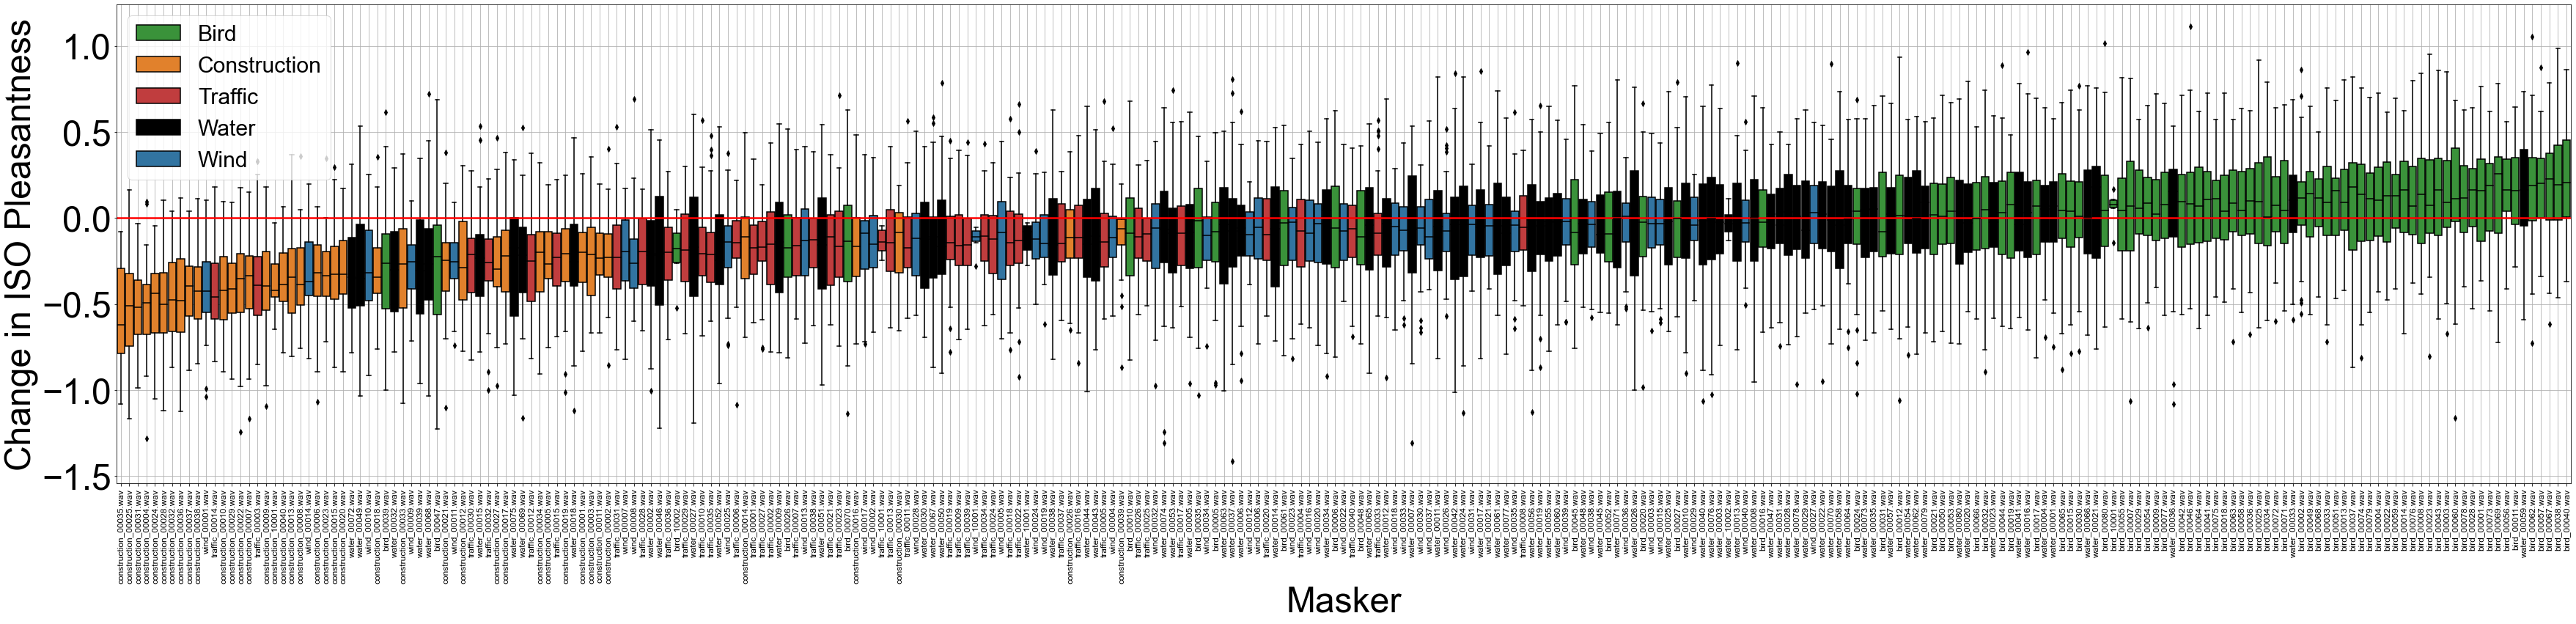

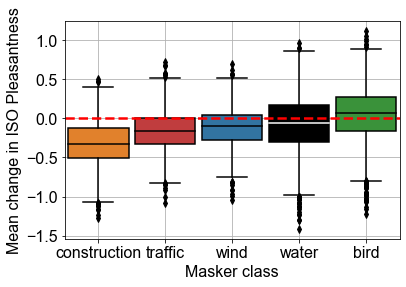

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

# GET DIRECTORIES
metadata_dir = os.path.join('..','data') # Folder containing all the metadata files; edit as necessary for your system.
maskers = pd.read_csv(os.path.join(f'{metadata_dir}','maskers.csv'))
responses = pd.read_csv(os.path.join(f'{metadata_dir}','responses.csv'), dtype = {'participant':str})

# EXTRACT RELEVANT DATA
responses_relevant = responses[responses['fold_r'] != -1]

# COMPUTE ISOPLS
attributes = ['pleasant', 'eventful', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'monotonous'] # Define attributes to extract from dataframes
ISOPl_weights = [1,0,-np.sqrt(2)/2,np.sqrt(2)/2, 0, np.sqrt(2)/2,-1,-np.sqrt(2)/2] # Define weights for each attribute in attributes in computation of ISO Pleasantness
ISOPls = ((responses_relevant[attributes] * ISOPl_weights).sum(axis=1)/(4+np.sqrt(32))).values
if 'ISOPl' not in responses_relevant.columns:
    responses_relevant.insert(loc=responses_relevant.shape[1],column='ISOPl',value=ISOPls)

# AGGREGATE DATA
ISOPls_df = responses_relevant.groupby(['soundscape','masker']).mean()['ISOPl'].to_frame().join(maskers.set_index('masker')['class']).reset_index('masker')
ISOPls_by_soundscape = ISOPls_df.join(ISOPls_df[ISOPls_df['class'] == 'silence'], lsuffix = '', rsuffix = '_ref')
ISOPls_by_soundscape['ISOPl_delta'] = ISOPls_by_soundscape['ISOPl']-ISOPls_by_soundscape['ISOPl_ref']
ISOPls_by_masker = ISOPls_by_soundscape.groupby(['masker','class']).mean().sort_values('ISOPl_delta').reset_index()
ISOPls_by_masker = ISOPls_by_masker[ISOPls_by_masker['class'] != 'silence'].reset_index(drop=True)
    
# MAKE PLOT BY MASKER
df_for_plotting = ISOPls_by_soundscape[ISOPls_by_soundscape['class'] != 'silence'].reset_index().set_index('masker').join(ISOPls_by_masker.set_index('masker'),rsuffix='_mean').reset_index().sort_values('ISOPl_delta_mean')
masker_class_color_dict = {'bird': '#2CA02C',
                           'construction': '#FF7F0E',
                           'traffic': '#D62728',
                           'water': '#000000',
                           'wind': '#1F77B4',
                           'silence': '#9467BD'}
masker_color_dict = {masker: masker_class_color_dict[masker.split('_')[0]] for masker in df_for_plotting['masker'].unique()}
plt.figure(figsize = (60,12))
ax = sns.boxplot(x='masker',y='ISOPl_delta',data=df_for_plotting, palette = masker_color_dict, width=0.90)
ax.set_xlabel('Masker', fontsize = 48)
ax.set_ylabel('Change in ISO Pleasantness', fontsize = 48)
ax.set_xticks(ax.get_xticks(),labels=ax.get_xticklabels(),rotation=90,fontsize=12)
plt.yticks(fontsize = 48)
ax.axhline(0,linewidth=2.5,color='red')
ax.grid(visible=True)
ax.set_axisbelow(True)
# ax.legend([ax.patches[0], ax.patches[1], ax.patches[27], ax.patches[2], ax.patches[24]],
#           ['Bird','Construction','Traffic','Water','Wind'], loc='upper left', fontsize = 30) # Correct for HDB version of ARAUS dataset (private).
ax.legend([ax.patches[31], ax.patches[0], ax.patches[11], ax.patches[27], ax.patches[10]],
          ['Bird','Construction','Traffic','Water','Wind'], loc='upper left', fontsize = 30) # Correct for DR-NTU version of ARAUS dataset (public).
plt.show()

# MAKE PLOT BY CLASS
df_for_class_plotting = ISOPls_by_soundscape[
        ISOPls_by_soundscape['class'] != 'silence'
    ].reset_index(
    ).set_index(
        'class'
    ).join(
        ISOPls_by_soundscape.groupby('class').mean(),
        rsuffix='_class_mean'
    ).reset_index(
    ).sort_values(
        'ISOPl_class_mean'
    )
ax = sns.boxplot(x='class',y='ISOPl_delta',data=df_for_class_plotting, palette = masker_class_color_dict, width=0.90)
ax.set_xlabel('Masker class')
ax.set_ylabel('Mean change in ISO Pleasantness')
ax.axhline(0,linewidth=2.5,color='red',linestyle='--')
ax.get_lines()[22].set_color('white')
ax.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

Expected output of the above block:
<img src="..\\figures\\ISOPl_by_masker_box_sorted.png">
<img src="..\\figures\\ISOPl_by_masker_class_box_sorted.png">

# Discussion on theoretical (in ISO 12913-3) vs. observed (in ARAUS dataset) ISO Pleasantness and ISO Eventfulness distributions

## Import required packages

In [30]:
import itertools, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

## Graphical comparison of theoretical vs. observed distributions

By the circumplex model of ISO 12913-3, we have the following definitions:

$\text{ISO Pleasantness} = \underbrace{\left(\text{pl} - \text{an}\right)}_{\text{Integer part}} + \frac{\sqrt{2}}{2}\underbrace{\left(\text{ca}-\text{ch}+\text{vi}-\text{mo}\right)}_{\text{Irrational part}}$, and

$\text{ISO Eventfulness} = \underbrace{\left(\text{ev} - \text{ue}\right)}_{\text{Integer part}} + \frac{\sqrt{2}}{2}\underbrace{\left(\text{ch}-\text{ca}+\text{vi}-\text{mo}\right)}_{\text{Irrational part}}$, where

- $\text{pl}$ is the rating for "pleasant" on a scale of 1 to 5,
- $\text{an}$ is the rating for "annoying" on a scale of 1 to 5,
- $\text{ev}$ is the rating for "eventful" on a scale of 1 to 5,
- $\text{ue}$ is the rating for "uneventful" on a scale of 1 to 5,
- $\text{ca}$ is the rating for "calm" on a scale of 1 to 5,
- $\text{ch}$ is the rating for "chaotic" on a scale of 1 to 5,
- $\text{vi}$ is the rating for "vibrant" on a scale of 1 to 5,
- $\text{mo}$ is the rating for "monotonous" on a scale of 1 to 5,

which gives possible values for $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$ in the interval $I = \left[-4-\sqrt{32},4+\sqrt{32}\right]$. These are meant to be calculated using the median of responses for a given soundscape, but may also be calculated using individual responses as discussed in the following article:

>Mitchell A., Aletta F., & Kang J., "How to analyse and represent quantitative soundscape data", <i>JASA Express Letters</i> <b>2</b>, 037201 (2022) https://doi.org/10.1121/10.0009794.

However, since the ratings are discrete integer values in $\{1,2,3,4,5\}$, the possible values for $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$ are themselves not going to be uniformly distributed in $I$ even if the ratings are uniformly distributed. We hypothesise that given a uniform distribution of ratings, the distributions for $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$ will be highly non-trivial due to the discretisation occuring in the rating scales.

We shall empirically investigate this by brute-forcing the distributions.

First, notice that the equations for $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$ can be decomposed into an integer part and an irrational part, such that $\text{ISO Pleasantness} = a + \frac{\sqrt{2}}{2}b$, and $\text{ISO Eventfulness} = c + \frac{\sqrt{2}}{2}d$, for some integers $a,b,c,d$. Hence, each value of ISO Pleasantness can be characterised by a pair of integers $(a,b)$ and each value of ISO Eventfulness can be characterised by a pair of integers $(c,d)$. Notice that $a,c\in\{-4,-3,...,3,4\}$ (9 possible values) and $b,d\in\{-8,-7,...,7,8\}$ (17 possible values), but $(a,b,c,d)$ does not take all possible values in $\{-4,-3,...,3,4\}\times\{-8,-7,...,7,8\}\times\{-4,-3,...,3,4\}\times\{-8,-7,...,7,8\}$ because of the shared attributes used in the computation of $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$.

We can thus count the occurrence of each possible value that $\text{ISO Pleasantness}$ and $\text{ISO Eventfulness}$ can take as follows:

In [3]:
counts_ISOPl = np.zeros((9,17)) # Rows count for possible integer values, columns count for possible irrational values
counts_ISOEv = np.zeros((9,17))
for pl, ev, ch, vi, ue, ca, an, mo in itertools.product(np.arange(1,6),repeat=8):
    int_part_ISOPl = pl - an # Times 1 
    irrational_part_ISOPl = - ch + vi + ca - mo # Times np.sqrt(2)/2
    counts_ISOPl[int_part_ISOPl,irrational_part_ISOPl] += 1
    
    int_part_ISOEv = ev - ue
    irrational_part_ISOEv = ch + vi - ca - mo 
    counts_ISOEv[int_part_ISOEv,irrational_part_ISOEv] += 1

From the occurrence arrays `counts_ISOPl` and `counts_ISOEv`, we can rearrange the values to get the frequencies that we will use to plot the distribution

In [4]:
values = np.zeros(9*17)
ISOPl_frequencies = np.zeros(9*17)
ISOEv_frequencies = np.zeros(9*17)
for iteration, (i, j) in enumerate(itertools.product(range(-4,5), range(-8,9))):
    values[iteration] = i + j*np.sqrt(2)/2
    ISOPl_frequencies[iteration] = counts_ISOPl[i,j]
    ISOEv_frequencies[iteration] = counts_ISOEv[i,j]

The next block makes a plot of the theoretical distributions obtained for ISO Pleasantness and ISO Eventfulness assuming a uniform distribution of input ratings. We can see from the plots that the true distribution of ISO Pleasantness and ISO Eventfulness is actually a sort of "binomial mixture" distribution due to the addition of the integer and rational parts in different combinations. Furthermore, due to symmetry in the input arguments, the theoretical distributions of ISO Pleasantness and ISO Eventfulness are identical given a uniform distribution of input ratings. The peaks of each element of the mixture are, of course, the integers in [-4,4], with the height of the peak decreasing the further it is in absolute distance from 0. The analytic continuation of this "binomial mixture" distribution would of course be a Gaussian mixture distribution.

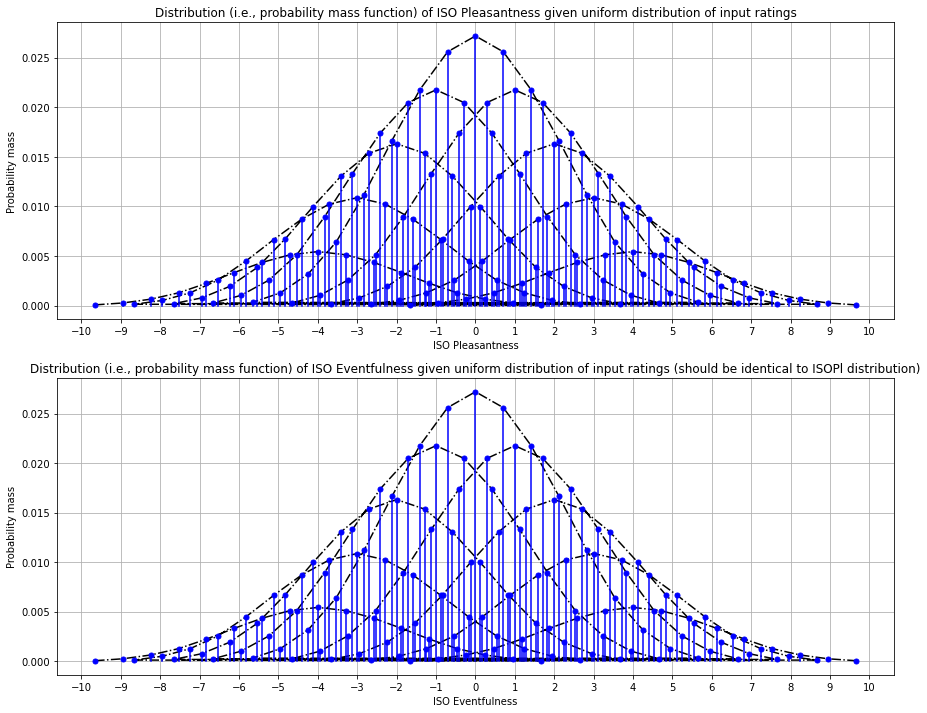

In [55]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

titles = ['Distribution (i.e., probability mass function) of ISO Pleasantness given uniform distribution of input ratings',
          'Distribution (i.e., probability mass function) of ISO Eventfulness given uniform distribution of input ratings (should be identical to ISOPl distribution)']
xlabels = ['ISO Pleasantness',
           'ISO Eventfulness']
frequencies = [ISOPl_frequencies,
               ISOEv_frequencies]

fig, ax = plt.subplots(figsize = (15,12), nrows = 2, ncols = 1)
for i, title, xlabel, frequency in zip([0,1],titles,xlabels,frequencies):
    ax[i].set_title(title)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel('Probability mass')
    ax[i].plot(values,frequency/(5**8),'k-.') # Normalise by 5**8 to get a PMF because 5**8 is the total number of counts
    ax[i].plot(values,frequency/(5**8),'b.',markersize=10)
    ax[i].grid(visible=True)
    for x,y in zip(values,frequency/(5**8)):
        ax[i].plot([x,x],[0,y],'b')
    ax[i].set_xticks(np.arange(-10,11))
plt.show()

Expected output of the above block:

<img src="../figures/distributions_theoretical.png">

The next block does the same plots as above, but without the nice dotted lines showing the binomial mixture. As can be observed, the distribution looks quite noisy.

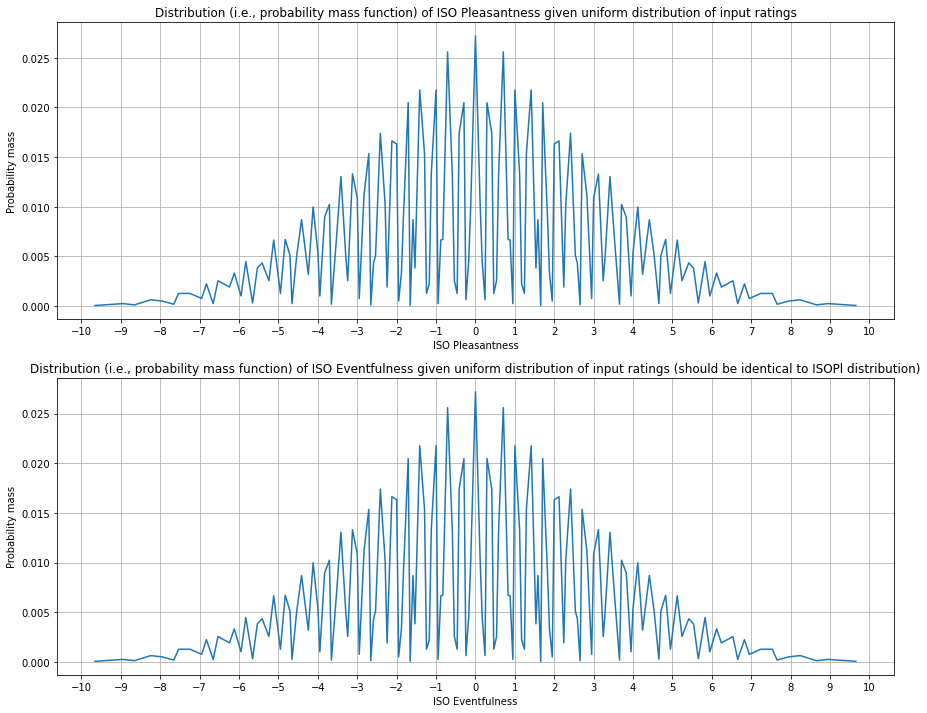

In [56]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

titles = ['Distribution (i.e., probability mass function) of ISO Pleasantness given uniform distribution of input ratings',
          'Distribution (i.e., probability mass function) of ISO Eventfulness given uniform distribution of input ratings (should be identical to ISOPl distribution)']
xlabels = ['ISO Pleasantness',
           'ISO Eventfulness']
frequencies = [ISOPl_frequencies,
               ISOEv_frequencies]

fig, ax = plt.subplots(figsize = (15,12), nrows = 2, ncols = 1)
for i, title, xlabel, frequency in zip([0,1],titles,xlabels,frequencies):
    frequency_sorted = pd.DataFrame([values,frequency/(5**8)]).T.sort_values(by=0).values
    ax[i].set_title(title)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel('Probability mass')
    ax[i].plot(frequency_sorted[:,0],frequency_sorted[:,1],'-')
    ax[i].grid(visible=True)
    ax[i].set_xticks(np.arange(-10,11))
plt.show()

Expected output of the above block:

<img src="../figures/distributions_theoretical_noisy.png">

Now, the question arises as to whether our empirical distribution (based on the ARAUS dataset responses we collected) is significantly different from this distribution. We hypothesise that it <i>should</i> be significantly different because otherwise what we collected is no better than random noise. The code to compute the empirical distribution is similar to that used to compute the theoretical distribution.

In [59]:
metadata_dir = os.path.join('..','data')
responses = pd.read_csv(os.path.join(f'{metadata_dir}','responses.csv'), dtype = {'participant':str})
responses = responses[responses['fold_r'] != -1] # Extract out only relevant responses.

counts_ISOPl_empirical = np.zeros((9,17)) # Rows count for possible integer values, columns count for possible irrational values
counts_ISOEv_empirical = np.zeros((9,17))
for idx, (_, row) in enumerate(responses.iterrows()):
    print(f'Now on {idx+1}/{len(responses)}...',end='\r')
    pl = row['pleasant']
    ev = row['eventful']
    ch = row['chaotic']
    vi = row['vibrant']
    ue = row['uneventful']
    ca = row['calm']
    an = row['annoying']
    mo = row['monotonous']
    
    int_part_ISOPl = pl - an # Times 1 (for ISO Pl ranges from )
    irrational_part_ISOPl = - ch + vi + ca - mo # Times np.sqrt(2)/2
    counts_ISOPl_empirical[int_part_ISOPl,irrational_part_ISOPl] += 1
    
    int_part_ISOEv = ev - ue
    irrational_part_ISOEv = ch + vi - ca - mo 
    counts_ISOEv_empirical[int_part_ISOEv,irrational_part_ISOEv] += 1

From the empirical occurrence arrays `counts_ISOPl_empirical` and `counts_ISOEv_empirical`, we can rearrange the values to get the frequencies that we will use to plot the empirical distribution.

In [60]:
values = np.zeros(9*17)
ISOPl_frequencies_empirical = np.zeros(9*17)
ISOEv_frequencies_empirical = np.zeros(9*17)
for iteration, (i, j) in enumerate(itertools.product(range(-4,5), range(-8,9))):
    values[iteration] = i + j*np.sqrt(2)/2
    ISOPl_frequencies_empirical[iteration] = counts_ISOPl_empirical[i,j]
    ISOEv_frequencies_empirical[iteration] = counts_ISOEv_empirical[i,j]

Lastly, we plot the empirical distribution as observed in the ARAUS dataset responses:

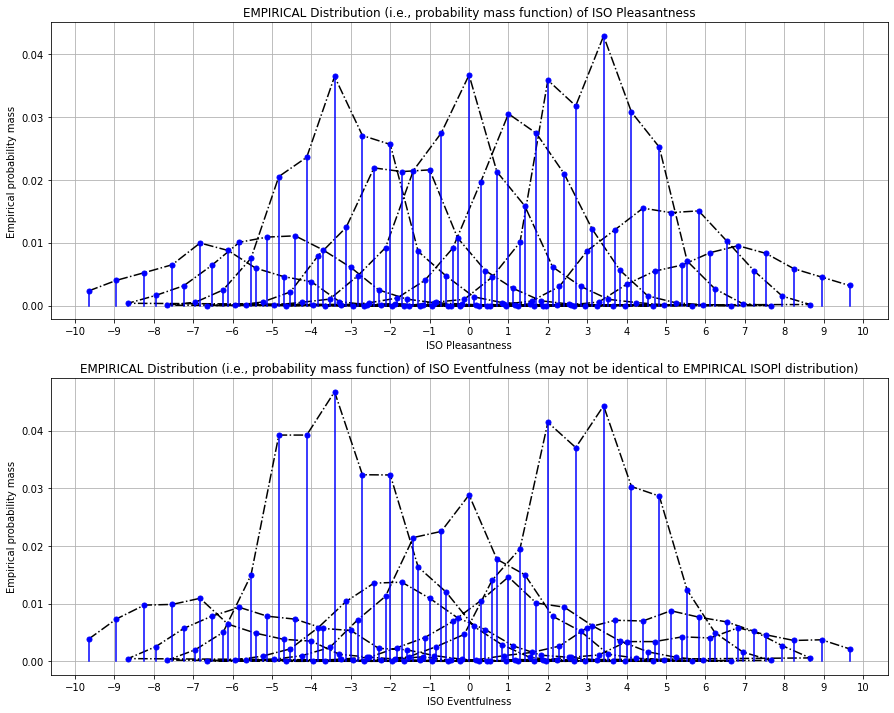

In [66]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

titles = ['EMPIRICAL Distribution (i.e., probability mass function) of ISO Pleasantness',
          'EMPIRICAL Distribution (i.e., probability mass function) of ISO Eventfulness (may not be identical to EMPIRICAL ISOPl distribution)']
xlabels = ['ISO Pleasantness',
           'ISO Eventfulness']
frequencies = [ISOPl_frequencies_empirical,
               ISOEv_frequencies_empirical]

fig, ax = plt.subplots(figsize = (15,12), nrows = 2, ncols = 1)
for i, title, xlabel, frequency in zip([0,1],titles,xlabels,frequencies):
    ax[i].set_title(title)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel('Empirical probability mass')
    ax[i].plot(values,frequency/(len(responses)),'k-.') # Normalise by 5**8 to get a PMF because 5**8 is the total number of counts
    ax[i].plot(values,frequency/(len(responses)),'b.',markersize=10)
    ax[i].grid(visible=True)
    for x,y in zip(values,frequency/(len(responses))):
        ax[i].plot([x,x],[0,y],'b')
    ax[i].set_xticks(np.arange(-10,11))
plt.show()

Expected output of the above block:

<img src="../figures/distributions_empirical.png">

The next block does the same plots as above, but without the nice dotted lines.

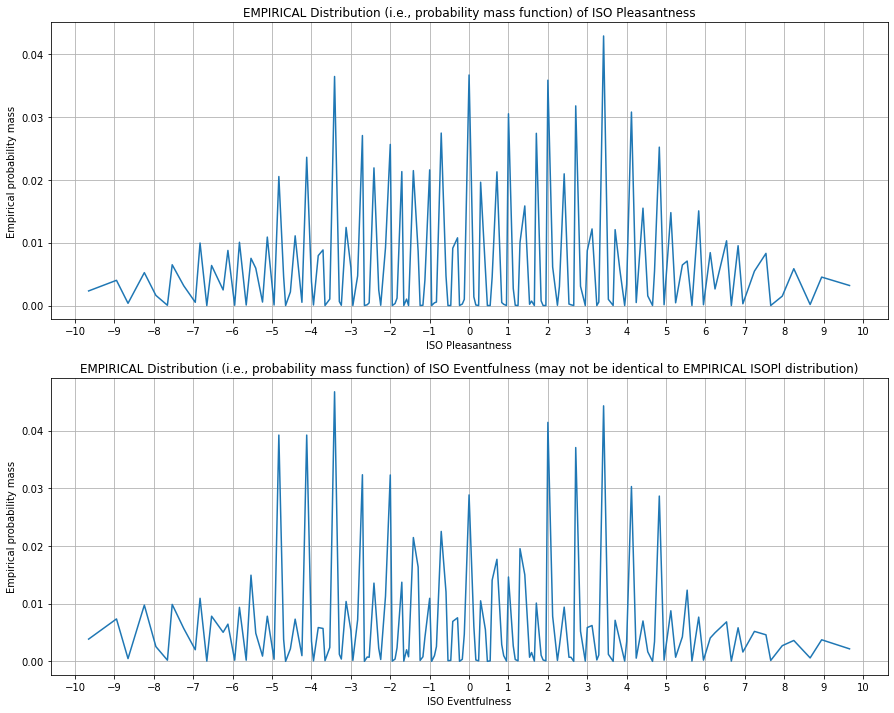

In [70]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

titles = ['EMPIRICAL Distribution (i.e., probability mass function) of ISO Pleasantness',
          'EMPIRICAL Distribution (i.e., probability mass function) of ISO Eventfulness (may not be identical to EMPIRICAL ISOPl distribution)']
xlabels = ['ISO Pleasantness',
           'ISO Eventfulness']
frequencies = [ISOPl_frequencies_empirical,
               ISOEv_frequencies_empirical]

fig, ax = plt.subplots(figsize = (15,12), nrows = 2, ncols = 1)
for i, title, xlabel, frequency in zip([0,1],titles,xlabels,frequencies):
    frequency_sorted = pd.DataFrame([values,frequency/(len(responses))]).T.sort_values(by=0).values
    ax[i].set_title(title)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel('Empirical probability mass')
    ax[i].plot(frequency_sorted[:,0],frequency_sorted[:,1],'-')
    ax[i].grid(visible=True)
    ax[i].set_xticks(np.arange(-10,11))
plt.show()

Expected output of the above block:

<img src="../figures/distributions_empirical_noisy.png">

Visually speaking, we can see that the distributions are different already. But let's just confirm it with a chi-squared test (for ISOPl only):

In [85]:
p_star = lambda p, thresholds = [0.05, 0.01, 0.001]: '*'*sum([p < t for t in thresholds]) # Prints as many asterisks as number of thresholds crossed.
print(f'Results of chi-squared tests for equality of distributions:')
print(f'    Attribute    | Chi^2 val. | p-val.')
print(f'-----------------+------------+-------')
for key, obs_counts, exp_counts in zip(['ISO Pleasantness','ISO Eventfulness'],
                                       [ISOPl_frequencies_empirical, ISOEv_frequencies_empirical],
                                       [ISOPl_frequencies/(5**8)*len(responses), ISOEv_frequencies/(5**8)*len(responses)]):
    CHISQ = chisquare(obs_counts, exp_counts)
    print(f'{key} | {CHISQ.statistic:.4f} | {CHISQ.pvalue:.4f} {p_star(CHISQ.pvalue)}')

Results of chi-squared tests for equality of distributions:
    Attribute    | Chi^2 val. | p-val.
-----------------+------------+-------
ISO Pleasantness | 31644.1739 | 0.0000 ***
ISO Eventfulness | 45392.0585 | 0.0000 ***


Expected output of the above block:
```
Results of chi-squared tests for equality of distributions:
    Attribute    | Chi^2 val. | p-val.
-----------------+------------+-------
ISO Pleasantness | 31644.1739 | 0.0000 ***
ISO Eventfulness | 45392.0585 | 0.0000 ***
```

## Histogram representations of ISO Pleasantness and ISO Eventfulness distributions

Looking at the theoretical distributions of ISO Pleasantness/Eventfulness given a uniform input distribution, it's actually quite confusing to analyse results based on individual point values on the x-axis because of the "binomial mixture" nature of the output distribution. Hence, a better way is to group possible x-axis values into suitable histogram bins for neat visualisation. In the next block, we explore a selection of histograms with odd-numbered bins based on `ISOPl_frequencies`. There is no need to do the same for `ISOEv_frequencies` since (as we established earlier) its distribution is identical to that of `ISOPl_frequencies`.

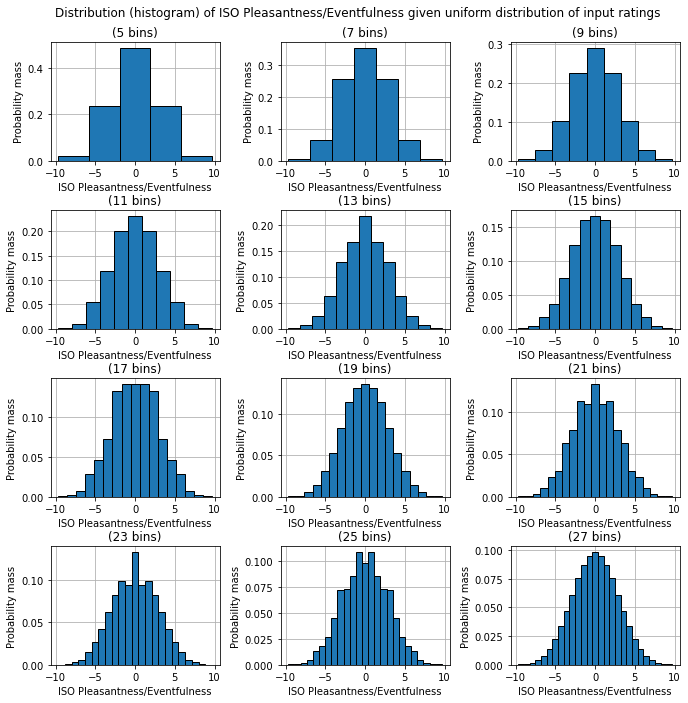

In [140]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

fig, ax = plt.subplots(figsize = (10,10), nrows = 4, ncols = 3)
fig.tight_layout(pad=3)
fig.suptitle('Distribution (histogram) of ISO Pleasantness/Eventfulness given uniform distribution of input ratings')
fig.subplots_adjust(top=0.93)
for idx, n_bins in enumerate(range(5,29,2)):
    ax[idx//3,idx%3].set_title(f'({n_bins} bins)')
    ax[idx//3,idx%3].set_xlabel('ISO Pleasantness/Eventfulness')
    ax[idx//3,idx%3].set_ylabel('Probability mass')
    n, bins, patches = ax[idx//3,idx%3].hist(values, bins = n_bins, weights=ISOPl_frequencies/(5**8), edgecolor = "#000000")
    ax[idx//3,idx%3].grid(visible=True)
    ax[idx//3,idx%3].set_axisbelow(True)
plt.show()

Expected output of the above block:
    
<img src="../figures/distributions_histogram_bins.png">

Note that we didn't use even-numbered bins because those make asymmetric histogram distributions, and we didn't go above 27 for the number of bins because the distributions start devolving into the "noisy" binomial mixtures from 28 onwards (this can be confirmed by adjusting the range in the above 'for' loop).

From the plotted histograms, it seems like 19 and 27 are good numbers of bins to use. 19 because the bins are spaced approximately 1 apart in that case, and 27 because it is the highest number where the result looks like a normal distribution. For now, we continue with 27 bins. We re-plot the theoretical and empirical distributions using the next block:

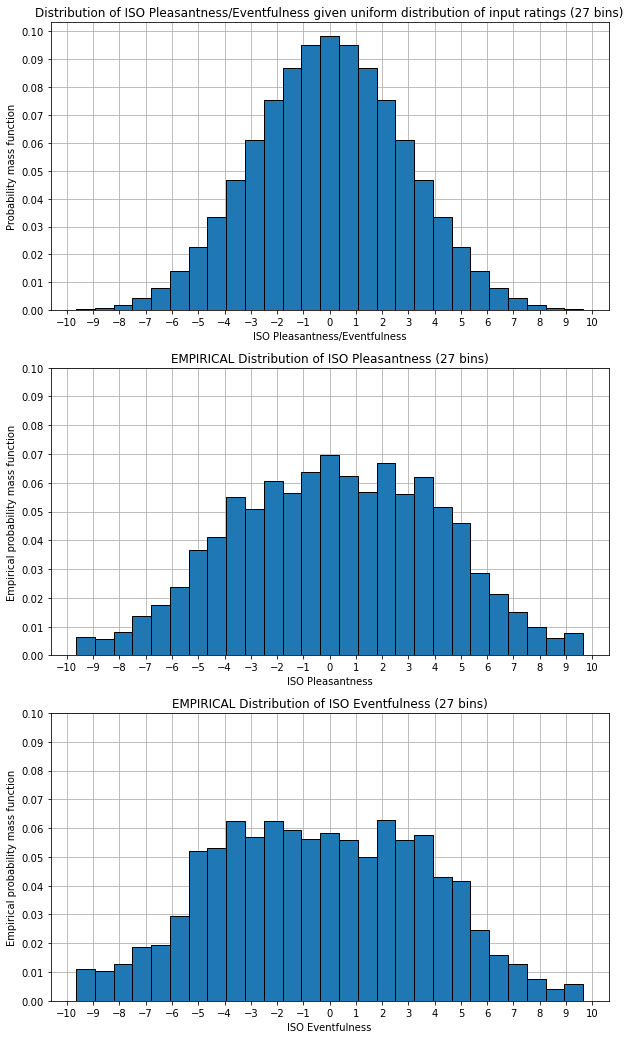

In [150]:
n_bins = 27 # 19 or 27 are good. Set to 153 to get the same rough shape as the point-wise plots.
fig, ax = plt.subplots(figsize = (10,18), nrows = 3, ncols = 1)
ax[0].set_title(f'Distribution of ISO Pleasantness/Eventfulness given uniform distribution of input ratings ({n_bins} bins)')
ax[0].set_xlabel('ISO Pleasantness/Eventfulness')
ax[0].set_ylabel('Probability mass function')
n, bins, patches = ax[0].hist(values, bins = n_bins, weights=ISOPl_frequencies/(5**8), edgecolor = "#000000") # Store into bins to use for empirical distribution.
ax[0].grid(visible=True)
ax[0].set_axisbelow(True)
ax[0].set_xticks(np.arange(-10,11))
ax[0].set_yticks(np.arange(0,0.11,0.01))

ax[1].set_title(f'EMPIRICAL Distribution of ISO Pleasantness ({n_bins} bins)')
ax[1].set_xlabel('ISO Pleasantness')
ax[1].set_ylabel('Empirical probability mass function')
ax[1].hist(values, bins = bins, weights=ISOPl_frequencies_empirical/(len(responses)), edgecolor = "#000000")
ax[1].grid(visible=True)
ax[1].set_axisbelow(True)
ax[1].set_xticks(np.arange(-10,11))
ax[1].set_yticks(np.arange(0,0.11,0.01))

ax[2].set_title(f'EMPIRICAL Distribution of ISO Eventfulness ({n_bins} bins)')
ax[2].set_xlabel('ISO Eventfulness')
ax[2].set_ylabel('Empirical probability mass function')
ax[2].hist(values, bins = bins, weights=ISOEv_frequencies_empirical/(len(responses)), edgecolor = "#000000")
ax[2].grid(visible=True)
ax[2].set_axisbelow(True)
ax[2].set_xticks(np.arange(-10,11))
ax[2].set_yticks(np.arange(0,0.11,0.01))

plt.show()

Expected output of the above block:
    
<img src="../figures/distributions_histograms.png">

# Additional linear models for ISO Pleasantness, ISO Eventfulness, and quadrant classification

In this section, we run a few additional models (linear, lasso, and ridge regression) for prediction of the normalised ISO Pleasantness, and replicate the same setup with the elastic net model for ISO Eventfulness. Note that the ISO Pleasantness and ISO Eventfulness values computed as ground-truth labels are values in the closed interval [-1,1].

We then combine the ISO Pleasantness predictions $P$ and ISO Eventfulness predictions $E$ to make "quadrant classification" models, where the prediction $Q$ corresponds to the quadrant in the ISO 12913-3:2019 circumplex model that the soundscape would be classified as (0 = "Vibrant", 1 = "Chaotic", 2 = "Monotonous", 3 = "Calm"). Specifically, we define the labels for "quadrant classification" as

$\begin{align}
    Q(P,E) &=
        \begin{cases}
            0, & \text{ if } P > 0 \text{ and } E > 0 \\
            1, & \text{ if } P \leq 0 \text{ and } E > 0 \\
            2, & \text{ if } P \leq 0 \text{ and } E \leq 0 \\
            3, & \text{ if } P > 0 \text{ and } E \leq 0 \\
        \end{cases}
\end{align}$

These models were published as part of our ICA 2022 publication, so for more details, please refer to the following:

> K. Ooi, K. N. Watcharasupat, B. Lam, Z.-T. Ong, and W.-S. Gan, "A benchmark comparison of perceptual models for soundscapes on a large-scale augmented soundscape dataset," in <i>24th International Congress on Acoustics (ICA 2022)</i>, Gyeongju, Korea, 2022.

## Import relevant packages

In [1]:
import sklearn.linear_model
import numpy as np
import pandas as pd
import os

## Define simple functions

For this section, we define the following:
- `clip`: Clips an array `x` to values between `x_min` and `x_max`. By default we clip all predictions to a minimum value of -1 and a maximum value of 1, since we know that normalized ISO Pleasantness and Eventfulness values cannot go outside of the range [-1,1].
- `quadrant_labels`: Returns 0, 1, 2, 3 for quadrants in anti-clockwise order, starting with 0 on the top right. E.g. `quadrant_labels(np.array([1,0,0,1]),np.array([1,1,0,0]))` returns `np.array([0,1,2,3])`

In [2]:
clip = lambda x, x_min = -1, x_max = 1: np.where(np.where(x < x_min,x_min,x) > x_max, x_max, np.where(x < x_min,x_min,x)) 
quadrant_labels = lambda ISOPls, ISOEvs: 2 + (ISOPls > 0) - (ISOEvs > 0) - 2 * (ISOEvs > 0) * (ISOPls > 0) 

## Load data files for responses

In [3]:
responses = pd.read_csv(os.path.join('..','data','responses.csv'), dtype = {'participant':str})

## Generate ground-truth labels

Firstly, we compute all the ground-truth labels and add them to the `responses` dataframe.

In [4]:
attributes = ['pleasant', 'eventful', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'monotonous'] # Define attributes to extract from dataframes
ISOPl_weights = [1,0,-np.sqrt(2)/2,np.sqrt(2)/2, 0, np.sqrt(2)/2,-1,-np.sqrt(2)/2] # Define weights for each attribute in attributes in computation of ISO Pleasantness
ISOEv_weights = [0,1, np.sqrt(2)/2,np.sqrt(2)/2,-1,-np.sqrt(2)/2, 0,-np.sqrt(2)/2] # Define weights for each attribute in attributes in computation of ISO Eventfulness

responses_copy = responses.copy() 
responses_copy['ISOPl'] = ((responses[attributes] * ISOPl_weights).sum(axis=1)/(4+np.sqrt(32))).values # These are normalised ISO Pleasantness values (in [-1,1])
responses_copy['ISOEv'] = ((responses[attributes] * ISOEv_weights).sum(axis=1)/(4+np.sqrt(32))).values # These are normalised ISO Eventfulness values (in [-1,1])

## Dummy models

### ISO Pleasantness

Now, we compute the relevant metrics for a dummy "label mean" model for ISO Pleasantness, which just predicts the mean of the ground-truth labels in its training set no matter the input.

In [5]:
train_mmse = 0
val_mmse = 0
test_mmse = 0
print('     |    Mean squared error    |        |       # samples      ')
print('Fold |--------+--------+--------| Label  |-------+-------+------')
print('     | Train  |   Val  |  Test  |  mean  | Train |  Val  | Test ')
print('-----+--------+--------+--------+--------+-------+-------+------')
for val_fold in [1,2,3,4,5]:
    df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
    df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
    df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

    y_hat = df_train['ISOPl'].mean() # This will be the label mean model's prediction for all unseen data.
    
    train_mse = ((df_train['ISOPl'] - y_hat)**2).mean() # Compute MSE on training set for label mean model
    val_mse   = ((  df_val['ISOPl'] - y_hat)**2).mean() # Compute MSE on validation set for label mean model
    test_mse  = (( df_test['ISOPl'] - y_hat)**2).mean() # Compute MSE on test set for label mean model
    
    train_mmse += train_mse
    val_mmse += val_mse
    test_mmse += test_mse
    
    print(f'{val_fold:4d} | {train_mse:.4f} | {val_mse:.4f} | {test_mse:.4f} | {y_hat:.4f} | {df_train.shape[0]:5d} | {df_val.shape[0]:5d} | {df_test.shape[0]:^5d}')

print(f'Mean | {train_mmse/5:.4f} | {val_mmse/5:.4f} | {test_mmse/5:.4f}')

     |    Mean squared error    |        |       # samples      
Fold |--------+--------+--------| Label  |-------+-------+------
     | Train  |   Val  |  Test  |  mean  | Train |  Val  | Test 
-----+--------+--------+--------+--------+-------+-------+------
   1 | 0.1557 | 0.1532 | 0.1173 | 0.0208 | 20160 |  5040 |  48  
   2 | 0.1563 | 0.1507 | 0.1207 | 0.0317 | 20160 |  5040 |  48  
   3 | 0.1542 | 0.1588 | 0.1204 | 0.0307 | 20160 |  5040 |  48  
   4 | 0.1531 | 0.1631 | 0.1196 | 0.0281 | 20160 |  5040 |  48  
   5 | 0.1562 | 0.1508 | 0.1179 | 0.0225 | 20160 |  5040 |  48  
Mean | 0.1551 | 0.1553 | 0.1192


Expected output of the above block:
```
     |    Mean squared error    |        |       # samples      
Fold |--------+--------+--------| Label  |-------+-------+------
     | Train  |   Val  |  Test  |  mean  | Train |  Val  | Test 
-----+--------+--------+--------+--------+-------+-------+------
   1 | 0.1557 | 0.1532 | 0.1173 | 0.0208 | 20160 |  5040 |  48  
   2 | 0.1563 | 0.1507 | 0.1207 | 0.0317 | 20160 |  5040 |  48  
   3 | 0.1542 | 0.1588 | 0.1204 | 0.0307 | 20160 |  5040 |  48  
   4 | 0.1531 | 0.1631 | 0.1196 | 0.0281 | 20160 |  5040 |  48  
   5 | 0.1562 | 0.1508 | 0.1179 | 0.0225 | 20160 |  5040 |  48  
Mean | 0.1551 | 0.1553 | 0.1192
```

### ISO Eventfulness

Similarly, we compute the relevant metrics for a dummy "label mean" model for ISO Eventfulness, which just predicts the mean of the ground-truth labels in its training set no matter the input.

In [6]:
train_mmse = 0
val_mmse = 0
test_mmse = 0
print('     |    Mean squared error    |         |       # samples      ')
print('Fold |--------+--------+--------|  Label  |-------+-------+------')
print('     | Train  |   Val  |  Test  |   mean  | Train |  Val  | Test ')
print('-----+--------+--------+--------+---------+-------+-------+------')
for val_fold in [1,2,3,4,5]:
    df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
    df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
    df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

    y_hat = df_train['ISOEv'].mean() # This will be the label mean model's prediction for all unseen data.
    
    train_mse = ((df_train['ISOEv'] - y_hat)**2).mean() # Compute MSE on training set for label mean model
    val_mse   = ((  df_val['ISOEv'] - y_hat)**2).mean() # Compute MSE on validation set for label mean model
    test_mse  = (( df_test['ISOEv'] - y_hat)**2).mean() # Compute MSE on test set for label mean model
    
    train_mmse += train_mse
    val_mmse += val_mse
    test_mmse += test_mse
    
    print(f'{val_fold:4d} | {train_mse:.4f} | {val_mse:.4f} | {test_mse:.4f} | {y_hat:.4f} | {df_train.shape[0]:5d} | {df_val.shape[0]:5d} | {df_test.shape[0]:^5d}')

print(f'Mean | {train_mmse/5:.4f} | {val_mmse/5:.4f} | {test_mmse/5:.4f}')

     |    Mean squared error    |         |       # samples      
Fold |--------+--------+--------|  Label  |-------+-------+------
     | Train  |   Val  |  Test  |   mean  | Train |  Val  | Test 
-----+--------+--------+--------+---------+-------+-------+------
   1 | 0.1664 | 0.1504 | 0.0966 | -0.0322 | 20160 |  5040 |  48  
   2 | 0.1620 | 0.1676 | 0.0972 | -0.0379 | 20160 |  5040 |  48  
   3 | 0.1674 | 0.1463 | 0.0971 | -0.0376 | 20160 |  5040 |  48  
   4 | 0.1621 | 0.1676 | 0.0968 | -0.0339 | 20160 |  5040 |  48  
   5 | 0.1578 | 0.1848 | 0.0979 | -0.0452 | 20160 |  5040 |  48  
Mean | 0.1631 | 0.1633 | 0.0971


Expected output of the above block:
```
     |    Mean squared error    |         |       # samples      
Fold |--------+--------+--------|  Label  |-------+-------+------
     | Train  |   Val  |  Test  |   mean  | Train |  Val  | Test 
-----+--------+--------+--------+---------+-------+-------+------
   1 | 0.1664 | 0.1504 | 0.0966 | -0.0322 | 20160 |  5040 |  48  
   2 | 0.1620 | 0.1676 | 0.0972 | -0.0379 | 20160 |  5040 |  48  
   3 | 0.1674 | 0.1463 | 0.0971 | -0.0376 | 20160 |  5040 |  48  
   4 | 0.1621 | 0.1676 | 0.0968 | -0.0339 | 20160 |  5040 |  48  
   5 | 0.1578 | 0.1848 | 0.0979 | -0.0452 | 20160 |  5040 |  48  
Mean | 0.1631 | 0.1633 | 0.0971
```

### Quadrant classification

Lastly, we compute the relevant metrics for a dummy "label mean" model for quadrant classification, which just predicts the mean of the ground-truth labels in its training set no matter the input.

In [7]:
train_accs = 0
val_accs = 0
test_accs = 0
print('     |         Accuracy         |       |       # samples      ')
print('Fold |--------+--------+--------| y_hat |-------+-------+------')
print('     | Train  |   Val  |  Test  |       | Train |  Val  | Test ')
print('-----+--------+--------+--------+-------+-------+-------+------')
for val_fold in [1,2,3,4,5]:
    df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
    df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
    df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

    quadrant_labels_train = quadrant_labels(df_train['ISOPl'].values, df_train['ISOEv'].values)
    quadrant_labels_val = quadrant_labels(df_val['ISOPl'].values, df_val['ISOEv'].values)
    quadrant_labels_test = quadrant_labels(df_test['ISOPl'].values, df_test['ISOEv'].values)
    
    y_hat = np.bincount(quadrant_labels_train).argmax() # A single integer corresponding to the most frequent class label
    
    train_acc = np.bincount(quadrant_labels_train).max()/np.bincount(quadrant_labels_train).sum() # Compute accuracy on training set for label mean model
    val_acc   = np.mean(quadrant_labels_val == y_hat) # Compute accuracy on validation set for label mean model
    test_acc  = np.mean(quadrant_labels_test == y_hat) # Compute accuracy on test set for label mean model
    
    train_accs += train_acc
    val_accs += val_acc
    test_accs += test_acc
    
    print(f'{val_fold:4d} | {train_acc:.4f} | {val_acc:.4f} | {test_acc:.4f} | {y_hat:^5d} | {df_train.shape[0]:5d} | {df_val.shape[0]:5d} | {df_test.shape[0]:^5d}')

print(f'Mean | {train_accs/5:.4f} | {val_accs/5:.4f} | {test_accs/5:.4f}')

     |         Accuracy         |       |       # samples      
Fold |--------+--------+--------| y_hat |-------+-------+------
     | Train  |   Val  |  Test  |       | Train |  Val  | Test 
-----+--------+--------+--------+-------+-------+-------+------
   1 | 0.3161 | 0.3393 | 0.3125 |   3   | 20160 |  5040 |  48  
   2 | 0.3186 | 0.3294 | 0.3125 |   3   | 20160 |  5040 |  48  
   3 | 0.3254 | 0.3018 | 0.3125 |   3   | 20160 |  5040 |  48  
   4 | 0.3189 | 0.3278 | 0.3125 |   3   | 20160 |  5040 |  48  
   5 | 0.3246 | 0.3054 | 0.3125 |   3   | 20160 |  5040 |  48  
Mean | 0.3207 | 0.3207 | 0.3125


Expected output of the above block:
```
     |         Accuracy         |       |       # samples      
Fold |--------+--------+--------| y_hat |-------+-------+------
     | Train  |   Val  |  Test  |       | Train |  Val  | Test 
-----+--------+--------+--------+-------+-------+-------+------
   1 | 0.3161 | 0.3393 | 0.3125 |   3   | 20160 |  5040 |  48  
   2 | 0.3186 | 0.3294 | 0.3125 |   3   | 20160 |  5040 |  48  
   3 | 0.3254 | 0.3018 | 0.3125 |   3   | 20160 |  5040 |  48  
   4 | 0.3189 | 0.3278 | 0.3125 |   3   | 20160 |  5040 |  48  
   5 | 0.3246 | 0.3054 | 0.3125 |   3   | 20160 |  5040 |  48  
Mean | 0.3207 | 0.3207 | 0.3125
```

## Linear models

We first define the predictor variables that we will be using in `relevant_columns`:

In [8]:
relevant_columns = ['Savg_r','Smax_r','S05_r','S10_r','S20_r','S30_r','S40_r','S50_r','S60_r','S70_r','S80_r','S90_r','S95_r',
                    'Navg_r','Nrmc_r','Nmax_r','N05_r','N10_r','N20_r','N30_r','N40_r','N50_r','N60_r','N70_r','N80_r','N90_r','N95_r',
                    'Favg_r','Fmax_r','F05_r','F10_r','F20_r','F30_r','F40_r','F50_r','F60_r','F70_r','F80_r','F90_r','F95_r',
                    'LAavg_r','LAmin_r','LAmax_r','LA05_r','LA10_r','LA20_r','LA30_r','LA40_r','LA50_r','LA60_r','LA70_r','LA80_r','LA90_r','LA95_r',
                    'LCavg_r','LCmin_r','LCmax_r','LC05_r','LC10_r','LC20_r','LC30_r','LC40_r','LC50_r','LC60_r','LC70_r','LC80_r','LC90_r','LC95_r',
                    'Ravg_r','Rmax_r','R05_r','R10_r','R20_r','R30_r','R40_r','R50_r','R60_r','R70_r','R80_r','R90_r','R95_r',
                    'Tgavg_r','Tavg_r','Tmax_r','T05_r','T10_r','T20_r','T30_r','T40_r','T50_r','T60_r','T70_r','T80_r','T90_r','T95_r',
                    'M00005_0_r','M00006_3_r','M00008_0_r','M00010_0_r','M00012_5_r','M00016_0_r','M00020_0_r','M00025_0_r','M00031_5_r','M00040_0_r',
                    'M00050_0_r','M00063_0_r','M00080_0_r','M00100_0_r','M00125_0_r','M00160_0_r','M00200_0_r','M00250_0_r','M00315_0_r','M00400_0_r',
                    'M00500_0_r','M00630_0_r','M00800_0_r','M01000_0_r','M01250_0_r','M01600_0_r','M02000_0_r','M02500_0_r','M03150_0_r','M04000_0_r',
                    'M05000_0_r','M06300_0_r','M08000_0_r','M10000_0_r','M12500_0_r','M16000_0_r','M20000_0_r']

### ISO Pleasantness

Note that the shapes of the arrays in the next block are:
- `X_train`: (20160, 132)
- `Y_train`: (20160,)
- `X_val`: (5040, 132)
- `Y_val`: (5040,)
- `X_test`: (48, 132)
- `Y_test`: (48,)

In addition, before computation of all metrics, predictions are clipped to [-1,1] if they fall outside the range, since we have prior knowledge that all predictions must fall in that range due to the definition of normalised ISO Pleasantness.

In [13]:
for model in [sklearn.linear_model.LinearRegression, sklearn.linear_model.ElasticNet, sklearn.linear_model.Lasso, sklearn.linear_model.Ridge]:
    print(f'Investigating performance of {model()} model...')
    MSEs_train = []
    MSEs_val = []
    MSEs_test = []
    
    print('     |    Mean squared error    |         |       # samples      | #     | # NZ ')
    print('Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-')
    print('     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures ')
    print('-----+--------+--------+--------+---------+-------+-------+------+-------+------')
    for val_fold in [1,2,3,4,5]:

        # Extract dataframes
        df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
        df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
        df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

        # Get ground-truth labels
        Y_train = df_train['ISOPl'].values
        Y_val   =   df_val['ISOPl'].values
        Y_test  =  df_test['ISOPl'].values

        # Get features
        X_train = df_train[relevant_columns].values 
        X_val = df_val[relevant_columns].values
        X_test = df_test[relevant_columns].values
        
        # Fit model
        X_LR = model().fit(X_train, Y_train)

        # Get MSEs
        MSE_train = np.mean((clip(X_LR.predict(X_train)) - Y_train)**2)
        MSE_val = np.mean((clip(X_LR.predict(X_val)) - Y_val)**2)
        MSE_test = np.mean((clip(X_LR.predict(X_test)) - Y_test)**2)

        # Add metrics
        MSEs_train.append(MSE_train)
        MSEs_val.append(MSE_val)
        MSEs_test.append(MSE_test)
        
        print(f'{val_fold:4d} | {MSE_train:.4f} | {MSE_val:.4f} | {MSE_test:.4f} | {X_LR.intercept_:7.4f} | {X_train.shape[0]:5d} | {X_val.shape[0]:5d} | {X_test.shape[0]:^4d} | {X_train.shape[1]:^5d} | {np.sum(np.abs(X_LR.coef_) > 0):^5d}')
        
    print(f'Mean | {np.mean(MSEs_train):.4f} | {np.mean(MSEs_val):.4f} | {np.mean(MSEs_test):.4f}')
    print()

Investigating performance of LinearRegression() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1176 | 0.1366 | 0.2549 |  0.2489 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1182 | 0.1278 | 0.6128 | -1.2436 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1168 | 0.1583 | 0.7371 | -0.6145 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1144 | 0.1509 | 0.3792 | -0.4667 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1173 | 0.1330 | 0.6584 |  0.7546 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1169 | 0.1413 | 0.5285

Investigating performance of ElasticNet() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |------

Expected output of the above block:
```
Investigating performance of LinearRegression() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1176 | 0.1366 | 0.2549 |  0.2489 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1182 | 0.1278 | 0.6128 | -1.2436 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1168 | 0.1583 | 0.7371 | -0.6145 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1144 | 0.1509 | 0.3792 | -0.4667 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1173 | 0.1330 | 0.6584 |  0.7546 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1169 | 0.1413 | 0.5285

Investigating performance of ElasticNet() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1360 | 0.1321 | 0.0912 |  0.3074 | 20160 |  5040 |  48  |  132  |   3  
   2 | 0.1368 | 0.1284 | 0.0954 |  0.3105 | 20160 |  5040 |  48  |  132  |   2  
   3 | 0.1351 | 0.1384 | 0.0941 |  0.2898 | 20160 |  5040 |  48  |  132  |   2  
   4 | 0.1329 | 0.1439 | 0.0941 |  0.3070 | 20160 |  5040 |  48  |  132  |   2  
   5 | 0.1349 | 0.1355 | 0.0900 |  0.3029 | 20160 |  5040 |  48  |  132  |   3  
Mean | 0.1351 | 0.1357 | 0.0930

Investigating performance of Lasso() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1441 | 0.1401 | 0.1004 |  0.1408 | 20160 |  5040 |  48  |  132  |   1  
   2 | 0.1452 | 0.1373 | 0.1042 |  0.1467 | 20160 |  5040 |  48  |  132  |   1  
   3 | 0.1422 | 0.1465 | 0.1032 |  0.1547 | 20160 |  5040 |  48  |  132  |   1  
   4 | 0.1408 | 0.1512 | 0.1021 |  0.1536 | 20160 |  5040 |  48  |  132  |   1  
   5 | 0.1421 | 0.1408 | 0.0984 |  0.1613 | 20160 |  5040 |  48  |  132  |   1  
Mean | 0.1429 | 0.1432 | 0.1016

Investigating performance of Ridge() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1186 | 0.1370 | 0.2027 |  0.4949 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1198 | 0.1257 | 0.5966 | -0.2620 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1176 | 0.1567 | 0.6957 | -0.1206 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1152 | 0.1496 | 0.3197 |  0.2808 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1186 | 0.1349 | 0.6194 |  0.5943 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1180 | 0.1408 | 0.4868
```

### ISO Eventfulness

Note that the shapes of the arrays in the next block are:
- `X_train`: (20160, 132)
- `Y_train`: (20160,)
- `X_val`: (5040, 132)
- `Y_val`: (5040,)
- `X_test`: (48, 132)
- `Y_test`: (48,)

In addition, before computation of all metrics, predictions are clipped to [-1,1] if they fall outside the range, since we have prior knowledge that all predictions must fall in that range due to the definition of normalised ISO Eventfulness.

In [14]:
for model in [sklearn.linear_model.LinearRegression, sklearn.linear_model.ElasticNet, sklearn.linear_model.Lasso, sklearn.linear_model.Ridge]:
    print(f'Investigating performance of {model()} model...')
    MSEs_train = []
    MSEs_val = []
    MSEs_test = []
    
    print('     |    Mean squared error    |         |       # samples      | #     | # NZ ')
    print('Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-')
    print('     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures ')
    print('-----+--------+--------+--------+---------+-------+-------+------+-------+------')
    for val_fold in [1,2,3,4,5]:

        # Extract dataframes
        df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
        df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
        df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

        # Get ground-truth labels
        Y_train = df_train['ISOEv'].values
        Y_val   =   df_val['ISOEv'].values
        Y_test  =  df_test['ISOEv'].values

        # Get features
        X_train = df_train[relevant_columns].values 
        X_val = df_val[relevant_columns].values
        X_test = df_test[relevant_columns].values

        # Fit model
        X_LR = model().fit(X_train, Y_train)

        # Get MSEs
        MSE_train = np.mean((clip(X_LR.predict(X_train)) - Y_train)**2)
        MSE_val = np.mean((clip(X_LR.predict(X_val)) - Y_val)**2)
        MSE_test = np.mean((clip(X_LR.predict(X_test)) - Y_test)**2)

        # Add metrics
        MSEs_train.append(MSE_train)
        MSEs_val.append(MSE_val)
        MSEs_test.append(MSE_test)
        
        print(f'{val_fold:4d} | {MSE_train:.4f} | {MSE_val:.4f} | {MSE_test:.4f} | {X_LR.intercept_:7.4f} | {X_train.shape[0]:5d} | {X_val.shape[0]:5d} | {X_test.shape[0]:^4d} | {X_train.shape[1]:^5d} | {np.sum(np.abs(X_LR.coef_) > 0):^5d}')
        
    print(f'Mean | {np.mean(MSEs_train):.4f} | {np.mean(MSEs_val):.4f} | {np.mean(MSEs_test):.4f}')
    print()

Investigating performance of LinearRegression() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1154 | 0.1248 | 0.0535 | -0.8683 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1148 | 0.1223 | 0.0384 | -0.8811 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1146 | 0.1400 | 0.0453 | -1.4650 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1132 | 0.1270 | 0.1484 | -1.1888 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1122 | 0.1321 | 0.0339 | -0.6494 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1140 | 0.1292 | 0.0639

Investigating performance of ElasticNet() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |------

Expected output of the above block:
```
Investigating performance of LinearRegression() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1154 | 0.1248 | 0.0535 | -0.8683 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1148 | 0.1223 | 0.0384 | -0.8811 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1146 | 0.1400 | 0.0453 | -1.4650 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1132 | 0.1270 | 0.1484 | -1.1888 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1122 | 0.1321 | 0.0339 | -0.6494 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1140 | 0.1292 | 0.0639

Investigating performance of ElasticNet() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1376 | 0.1297 | 0.0425 | -0.2748 | 20160 |  5040 |  48  |  132  |   4  
   2 | 0.1373 | 0.1365 | 0.0463 | -0.2423 | 20160 |  5040 |  48  |  132  |   4  
   3 | 0.1390 | 0.1247 | 0.0434 | -0.3780 | 20160 |  5040 |  48  |  132  |   6  
   4 | 0.1352 | 0.1401 | 0.0439 | -0.3372 | 20160 |  5040 |  48  |  132  |   4  
   5 | 0.1322 | 0.1546 | 0.0450 | -0.3418 | 20160 |  5040 |  48  |  132  |   4  
Mean | 0.1363 | 0.1371 | 0.0442

Investigating performance of Lasso() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1458 | 0.1339 | 0.0625 | -0.2230 | 20160 |  5040 |  48  |  132  |   1  
   2 | 0.1454 | 0.1462 | 0.0670 | -0.1950 | 20160 |  5040 |  48  |  132  |   2  
   3 | 0.1468 | 0.1302 | 0.0633 | -0.2273 | 20160 |  5040 |  48  |  132  |   1  
   4 | 0.1438 | 0.1489 | 0.0655 | -0.2056 | 20160 |  5040 |  48  |  132  |   1  
   5 | 0.1405 | 0.1653 | 0.0680 | -0.2086 | 20160 |  5040 |  48  |  132  |   1  
Mean | 0.1444 | 0.1449 | 0.0653

Investigating performance of Ridge() model...
     |    Mean squared error    |         |       # samples      | #     | # NZ 
Fold |--------+--------+--------| Inter-  |-------+-------+------| feat- | feat-
     | Train  |   Val  |  Test  |  cept   | Train |  Val  | Test | ures  | ures 
-----+--------+--------+--------+---------+-------+-------+------+-------+------
   1 | 0.1159 | 0.1210 | 0.0476 | -1.0526 | 20160 |  5040 |  48  |  132  |  132 
   2 | 0.1153 | 0.1197 | 0.0347 | -0.9006 | 20160 |  5040 |  48  |  132  |  132 
   3 | 0.1150 | 0.1284 | 0.0501 | -1.0920 | 20160 |  5040 |  48  |  132  |  132 
   4 | 0.1136 | 0.1254 | 0.1793 | -1.2394 | 20160 |  5040 |  48  |  132  |  132 
   5 | 0.1126 | 0.1306 | 0.0389 | -1.0446 | 20160 |  5040 |  48  |  132  |  132 
Mean | 0.1145 | 0.1250 | 0.0701
```

### Quadrant classification

In [15]:
quadrant_labels = lambda ISOPls, ISOEvs: 2 + (ISOPls > 0) - (ISOEvs > 0) - 2 * (ISOEvs > 0) * (ISOPls > 0)
for model_ISOPl, model_ISOEv in zip([sklearn.linear_model.LinearRegression, sklearn.linear_model.ElasticNet, sklearn.linear_model.Lasso, sklearn.linear_model.Ridge],
                                    [sklearn.linear_model.LinearRegression, sklearn.linear_model.ElasticNet, sklearn.linear_model.Lasso, sklearn.linear_model.Ridge]):
    print(f'Investigating performance of {model_ISOPl()} model...')
    MSEs_train_ISOPl = []
    MSEs_val_ISOPl = []
    MSEs_test_ISOPl = []
    MSEs_train_ISOEv = []
    MSEs_val_ISOEv = []
    MSEs_test_ISOEv = []
    ACCs_train = []
    ACCs_val = []
    ACCs_test = []
    
    print('     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         ')
    print('Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------')
    print('     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  ')
    print('-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------')
    for val_fold in [1,2,3,4,5]:
        # Extract dataframes
        df_train = responses_copy[(responses_copy['fold_r'] != val_fold) & (responses_copy['fold_r'] > 0)] # For the training set, use all samples that are not in the test set (fold 0) and current validation fold.
        df_val   = responses_copy[responses_copy['fold_r'] == val_fold]
        df_test  = responses_copy[responses_copy['fold_r'] == 0].groupby(['soundscape','masker','smr']).mean() # For the test set, the same 48 stimuli were shown to all participants so we take the mean of their ratings as the ground truth

        # Get ground-truth labels for ISOPl/ISOEv predictions
        Y_train_ISOPl = df_train['ISOPl'].values
        Y_val_ISOPl   =   df_val['ISOPl'].values
        Y_test_ISOPl  =  df_test['ISOPl'].values
        Y_train_ISOEv = df_train['ISOEv'].values
        Y_val_ISOEv   =   df_val['ISOEv'].values
        Y_test_ISOEv  =  df_test['ISOEv'].values

        # Get features
        X_train = df_train[relevant_columns].values 
        X_val = df_val[relevant_columns].values
        X_test = df_test[relevant_columns].values    
    
        # Fit ISOPl/ISOEv models
        X_LR_ISOPl = model_ISOPl().fit(X_train, Y_train_ISOPl)
        X_LR_ISOEv = model_ISOEv().fit(X_train, Y_train_ISOEv)

        # Get MSEs
        MSE_train_ISOPl = np.mean((clip(X_LR_ISOPl.predict(X_train)) - Y_train_ISOPl)**2)
        MSE_val_ISOPl = np.mean((clip(X_LR_ISOPl.predict(X_val)) - Y_val_ISOPl)**2)
        MSE_test_ISOPl = np.mean((clip(X_LR_ISOPl.predict(X_test)) - Y_test_ISOPl)**2)
        MSE_train_ISOEv = np.mean((clip(X_LR_ISOEv.predict(X_train)) - Y_train_ISOEv)**2)
        MSE_val_ISOEv = np.mean((clip(X_LR_ISOEv.predict(X_val)) - Y_val_ISOEv)**2)
        MSE_test_ISOEv = np.mean((clip(X_LR_ISOEv.predict(X_test)) - Y_test_ISOEv)**2)
        
        # Get accuracies
        ACC_train = np.mean(quadrant_labels(df_train['ISOPl'].values, df_train['ISOEv'].values) == quadrant_labels(clip(X_LR_ISOPl.predict(X_train)), clip(X_LR_ISOEv.predict(X_train))))
        ACC_val   = np.mean(quadrant_labels(df_val['ISOPl'].values  , df_val['ISOEv'].values)   == quadrant_labels(clip(X_LR_ISOPl.predict(X_val  )), clip(X_LR_ISOEv.predict(X_val  ))))
        ACC_test  = np.mean(quadrant_labels(df_test['ISOPl'].values , df_test['ISOEv'].values)  == quadrant_labels(clip(X_LR_ISOPl.predict(X_test )), clip(X_LR_ISOEv.predict(X_test ))))

        # Add metrics
        MSEs_train_ISOPl.append(MSE_train_ISOPl)
        MSEs_val_ISOPl.append(MSE_val_ISOPl)
        MSEs_test_ISOPl.append(MSE_test_ISOPl)
        MSEs_train_ISOEv.append(MSE_train_ISOEv)
        MSEs_val_ISOEv.append(MSE_val_ISOEv)
        MSEs_test_ISOEv.append(MSE_test_ISOEv)
        ACCs_train.append(ACC_train)
        ACCs_val.append(ACC_val)
        ACCs_test.append(ACC_test)
        
        print(f'{val_fold:4d} | {MSE_train_ISOPl:.4f} | {MSE_val_ISOPl:.4f} | {MSE_test_ISOPl:.4f} | {X_LR_ISOPl.intercept_:7.4f} | {MSE_train_ISOEv:.4f} | {MSE_val_ISOEv:.4f} | {MSE_test_ISOEv:.4f} | {X_LR_ISOEv.intercept_:7.4f} | {ACC_train:.4f} | {ACC_val:.4f} | {ACC_test:.4f} ')
        
    print(f'Mean | {np.mean(MSEs_train_ISOPl):.4f} | {np.mean(MSEs_val_ISOPl):.4f} | {np.mean(MSEs_test_ISOPl):.4f} |         | {np.mean(MSEs_train_ISOEv):.4f} | {np.mean(MSEs_val_ISOEv):.4f} | {np.mean(MSEs_test_ISOEv):.4f} |         | {np.mean(ACCs_train):.4f} | {np.mean(ACCs_val):.4f} | {np.mean(ACCs_test):.4f} ')
    print()

Investigating performance of LinearRegression() model...
     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         
Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------
     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  
-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------
   1 | 0.1176 | 0.1366 | 0.2549 |  0.2489 | 0.1154 | 0.1248 | 0.0535 | -0.8683 | 0.4831 | 0.4306 | 0.3125 
   2 | 0.1182 | 0.1278 | 0.6128 | -1.2436 | 0.1148 | 0.1223 | 0.0384 | -0.8811 | 0.4776 | 0.4837 | 0.2708 
   3 | 0.1168 | 0.1583 | 0.7371 | -0.6145 | 0.1146 | 0.1400 | 0.0453 | -1.4650 | 0.4914 | 0.4139 | 0.2917 
   4 | 0.1144 | 0.1509 | 0.3792 | -0.4667 | 0.1132 | 0.1270 | 0.1484 | -1.1888 | 0.4824 | 0.4534 | 0.3125 
   5 | 0.1173 | 0.1330 | 0.6584 |  0.7546 | 0.1122 | 0.1321 | 0.0339 | -0.6494 | 0.4839

Expected output of the above block:
```
Investigating performance of LinearRegression() model...
     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         
Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------
     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  
-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------
   1 | 0.1176 | 0.1366 | 0.2549 |  0.2489 | 0.1154 | 0.1248 | 0.0535 | -0.8683 | 0.4831 | 0.4306 | 0.3125 
   2 | 0.1182 | 0.1278 | 0.6128 | -1.2436 | 0.1148 | 0.1223 | 0.0384 | -0.8811 | 0.4776 | 0.4837 | 0.2708 
   3 | 0.1168 | 0.1583 | 0.7371 | -0.6145 | 0.1146 | 0.1400 | 0.0453 | -1.4650 | 0.4914 | 0.4139 | 0.2917 
   4 | 0.1144 | 0.1509 | 0.3792 | -0.4667 | 0.1132 | 0.1270 | 0.1484 | -1.1888 | 0.4824 | 0.4534 | 0.3125 
   5 | 0.1173 | 0.1330 | 0.6584 |  0.7546 | 0.1122 | 0.1321 | 0.0339 | -0.6494 | 0.4839 | 0.4300 | 0.2708 
Mean | 0.1169 | 0.1413 | 0.5285 |         | 0.1140 | 0.1292 | 0.0639 |         | 0.4837 | 0.4423 | 0.2917 

Investigating performance of ElasticNet() model...
     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         
Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------
     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  
-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------
   1 | 0.1360 | 0.1321 | 0.0912 |  0.3074 | 0.1376 | 0.1297 | 0.0425 | -0.2748 | 0.4401 | 0.4296 | 0.6458 
   2 | 0.1368 | 0.1284 | 0.0954 |  0.3105 | 0.1373 | 0.1365 | 0.0463 | -0.2423 | 0.4289 | 0.4657 | 0.6458 
   3 | 0.1351 | 0.1384 | 0.0941 |  0.2898 | 0.1390 | 0.1247 | 0.0434 | -0.3780 | 0.4378 | 0.4129 | 0.6250 
   4 | 0.1329 | 0.1439 | 0.0941 |  0.3070 | 0.1352 | 0.1401 | 0.0439 | -0.3372 | 0.4383 | 0.4397 | 0.6458 
   5 | 0.1349 | 0.1355 | 0.0900 |  0.3029 | 0.1322 | 0.1546 | 0.0450 | -0.3418 | 0.4362 | 0.4210 | 0.6458 
Mean | 0.1351 | 0.1357 | 0.0930 |         | 0.1363 | 0.1371 | 0.0442 |         | 0.4363 | 0.4338 | 0.6417 

Investigating performance of Lasso() model...
     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         
Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------
     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  
-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------
   1 | 0.1441 | 0.1401 | 0.1004 |  0.1408 | 0.1458 | 0.1339 | 0.0625 | -0.2230 | 0.4253 | 0.4175 | 0.6042 
   2 | 0.1452 | 0.1373 | 0.1042 |  0.1467 | 0.1454 | 0.1462 | 0.0670 | -0.1950 | 0.4075 | 0.4427 | 0.5000 
   3 | 0.1422 | 0.1465 | 0.1032 |  0.1547 | 0.1468 | 0.1302 | 0.0633 | -0.2273 | 0.4256 | 0.3877 | 0.5208 
   4 | 0.1408 | 0.1512 | 0.1021 |  0.1536 | 0.1438 | 0.1489 | 0.0655 | -0.2056 | 0.4197 | 0.4317 | 0.5208 
   5 | 0.1421 | 0.1408 | 0.0984 |  0.1613 | 0.1405 | 0.1653 | 0.0680 | -0.2086 | 0.4188 | 0.4115 | 0.5000 
Mean | 0.1429 | 0.1432 | 0.1016 |         | 0.1444 | 0.1449 | 0.0653 |         | 0.4194 | 0.4182 | 0.5292 

Investigating performance of Ridge() model...
     |Mean squared error (ISOPl)| Inter-  |Mean squared error (ISOEv)| Inter-  |         Accuracy         
Fold |--------+--------+--------|  cept   |--------+--------+--------|  cept   |--------+--------+--------
     | Train  |   Val  |  Test  | (ISOPl) | Train  |   Val  |  Test  | (ISOEv) | Train  |   Val  |  Test  
-----+--------+--------+--------+---------+--------+--------+--------+---------+--------+--------+--------
   1 | 0.1186 | 0.1370 | 0.2027 |  0.4949 | 0.1159 | 0.1210 | 0.0476 | -1.0526 | 0.4808 | 0.4272 | 0.3333 
   2 | 0.1198 | 0.1257 | 0.5966 | -0.2620 | 0.1153 | 0.1197 | 0.0347 | -0.9006 | 0.4764 | 0.4810 | 0.2708 
   3 | 0.1176 | 0.1567 | 0.6957 | -0.1206 | 0.1150 | 0.1284 | 0.0501 | -1.0920 | 0.4879 | 0.4159 | 0.3125 
   4 | 0.1152 | 0.1496 | 0.3197 |  0.2808 | 0.1136 | 0.1254 | 0.1793 | -1.2394 | 0.4804 | 0.4587 | 0.3125 
   5 | 0.1186 | 0.1349 | 0.6194 |  0.5943 | 0.1126 | 0.1306 | 0.0389 | -1.0446 | 0.4815 | 0.4218 | 0.2917 
Mean | 0.1180 | 0.1408 | 0.4868 |         | 0.1145 | 0.1250 | 0.0701 |         | 0.4814 | 0.4409 | 0.3042 
```

# Correlation analysis of psychological questionnaires

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools, os

Plot some heatmaps to visually observe for presence/absence of correlations between psychological questionnaires in the PIQ.

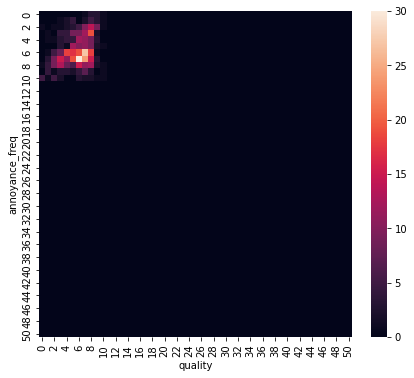

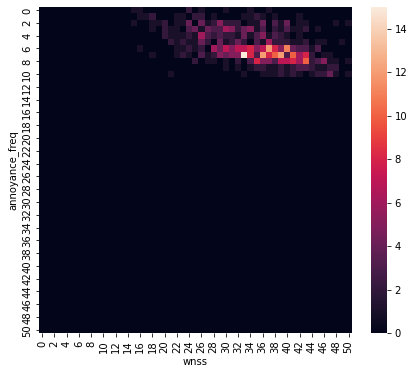

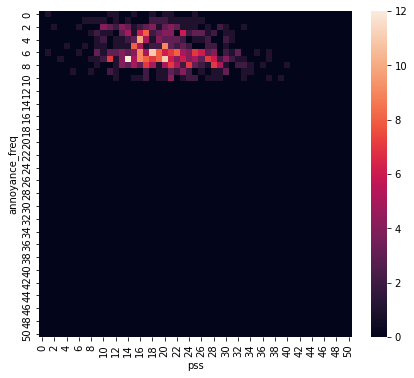

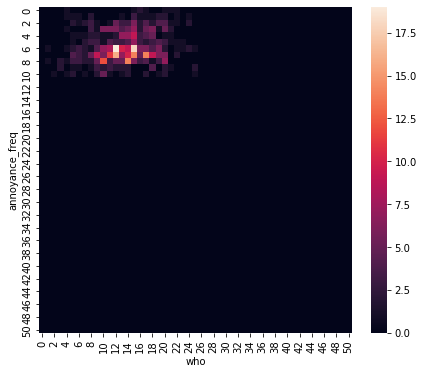

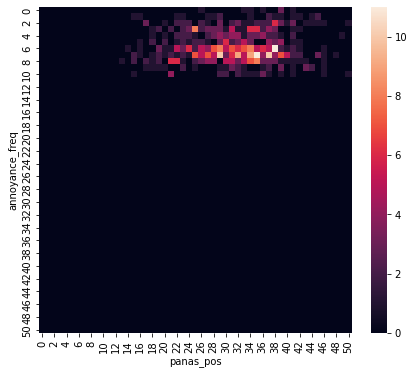

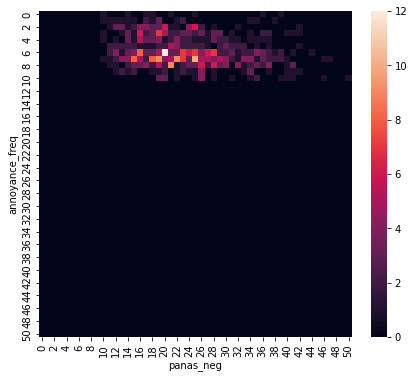

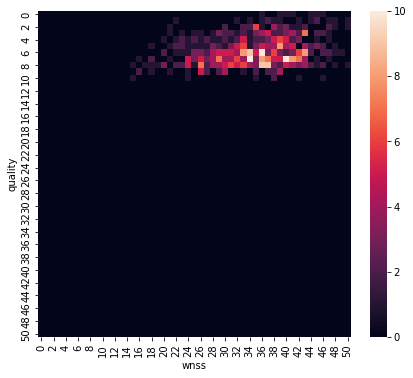

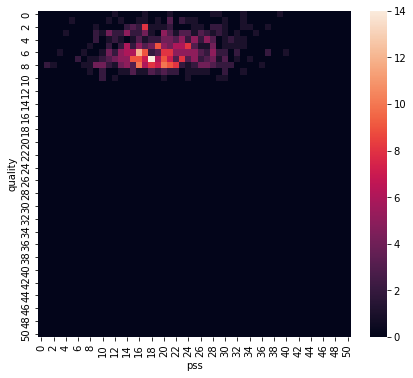

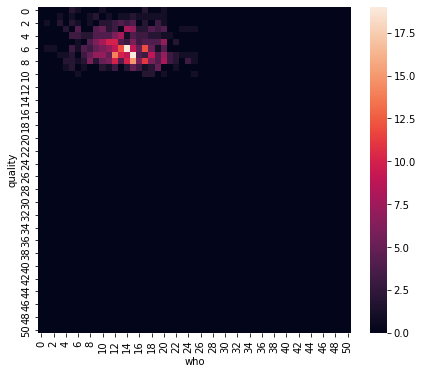

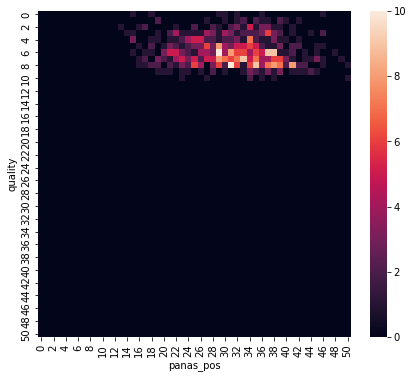

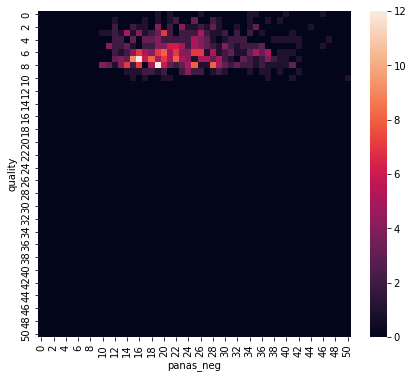

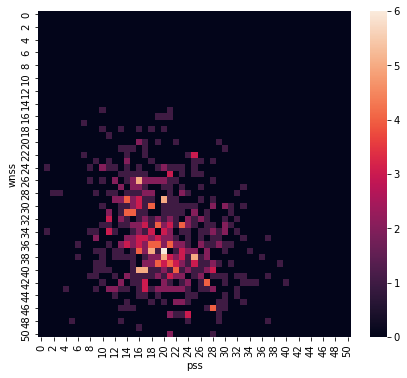

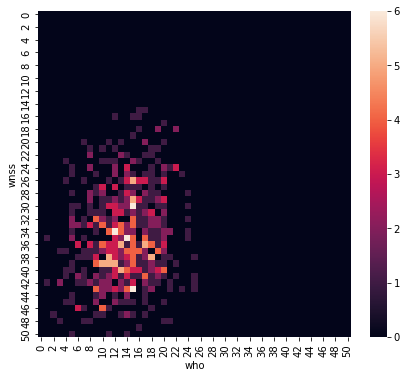

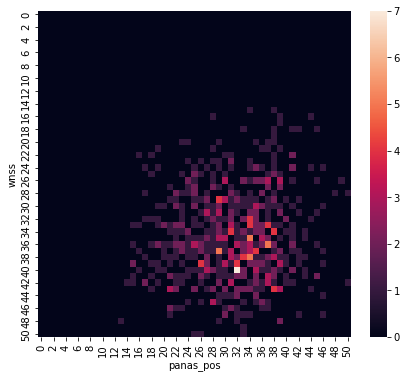

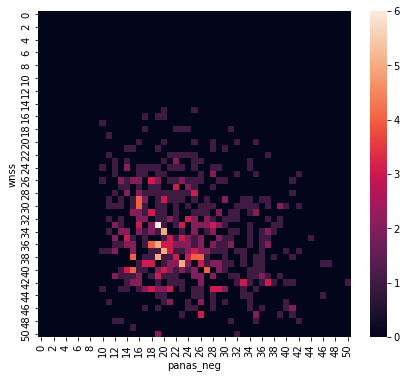

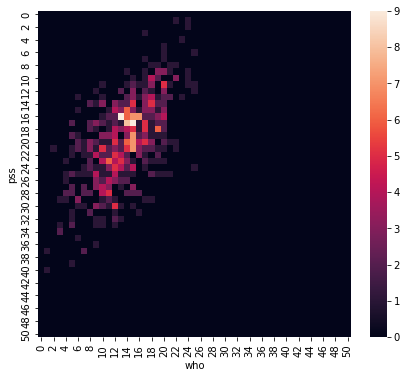

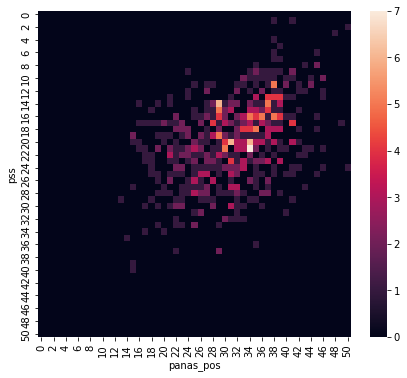

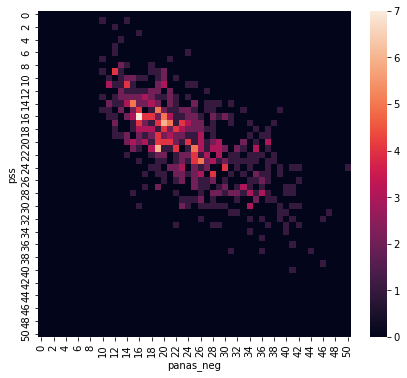

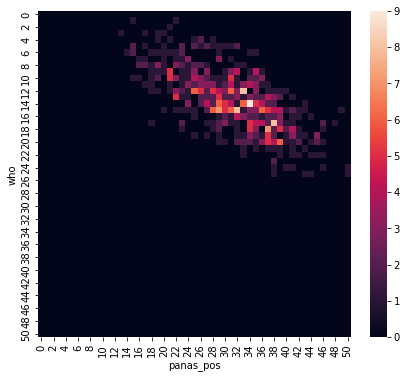

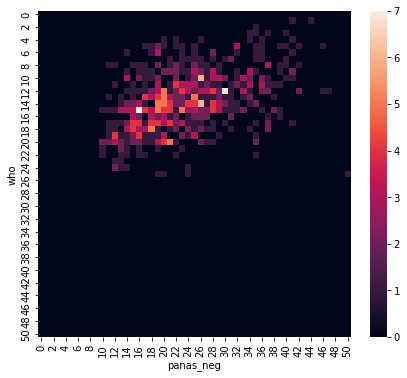

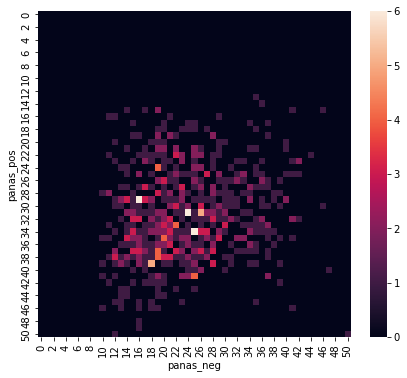

In [11]:
metadata_dir = os.path.join('..','data') # Folder containing all the metadata files; edit as necessary for your system.
participants = pd.read_csv(os.path.join(f'{metadata_dir}','participants.csv'))
attributes = ['annoyance_freq','quality','wnss','pss','who','panas_pos','panas_neg']
attribute_mins = [ 0, 0,10, 0, 0,10,10]
attribute_maxs = [10,10,50,40,25,50,50]

for x, y in itertools.combinations(attributes, 2):
    arr = np.zeros((51,51))
    for idx, row in participants[[x,y]].value_counts().iteritems():
        arr[idx] = row
    plt.figure(figsize=(7,6))
    sns.heatmap(arr)
    plt.xlabel(y)
    plt.ylabel(x)
    plt.show()

Expected output of the above block:

<img src="../figures/correlation_annoyance_freq_quality.png">
<img src="../figures/correlation_annoyance_freq_wnss.png">
<img src="../figures/correlation_annoyance_freq_pss.png">
<img src="../figures/correlation_annoyance_freq_who.png">
<img src="../figures/correlation_annoyance_freq_panas_pos.png">
<img src="../figures/correlation_annoyance_freq_panas_neg.png">
<img src="../figures/correlation_quality_wnss.png">
<img src="../figures/correlation_quality_pss.png">
<img src="../figures/correlation_quality_who.png">
<img src="../figures/correlation_quality_panas_pos.png">
<img src="../figures/correlation_quality_panas_neg.png">
<img src="../figures/correlation_wnss_pss.png">
<img src="../figures/correlation_wnss_who.png">
<img src="../figures/correlation_wnss_panas_pos.png">
<img src="../figures/correlation_wnss_panas_neg.png">
<img src="../figures/correlation_pss_who.png">
<img src="../figures/correlation_pss_panas_pos.png">
<img src="../figures/correlation_pss_panas_neg.png">
<img src="../figures/correlation_who_panas_pos.png">
<img src="../figures/correlation_who_panas_neg.png">
<img src="../figures/correlation_panas_pos_panas_neg.png">

We then plot the correlation matrix as a heatmap:

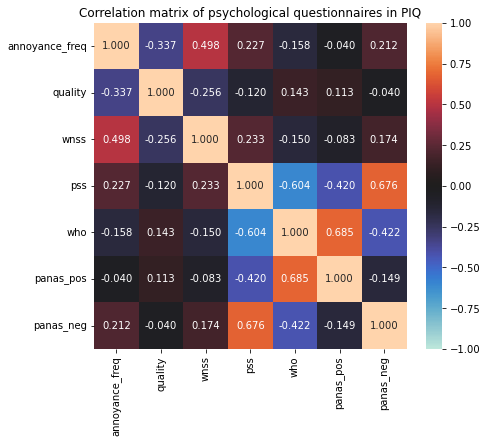

In [17]:
plt.figure(figsize=(7,6))
psych_corr_mat = np.corrcoef(participants[attributes].T) # Check correlations between psychological questionnaires.
plt.title('Correlation matrix of psychological questionnaires in PIQ')
sns.heatmap(psych_corr_mat,annot=True,fmt='.3f',vmin=-1,vmax=1,center=0,xticklabels=attributes,yticklabels=attributes)
plt.show()

Expected output of the above block:

<img src="../figures/correlation_matrix_psych.png">

# t-SNE visualisations of SOM results for soundscape/masker clustering

In the replication code, we visualised the SOM results by projecting every soundscape/masker onto their first 2 principal components.

Due to the popularity of t-SNE visualisations, in this section, we explore 2-dimensional t-SNE visualisations of the maskers and soundscapes after clustering and splitting into their respective folds in the ARAUS dataset, as an alternative to the visualisation provided in the replication code.

All subsections except for the last (click <a href="#tsne_visualisation"> here </a> to jump) are the same as that in the replication code (with commentary omitted for brevity), and the t-SNE visualisation is performed with the final SOM clustering results in the last subsection of this section.

## Import necessary packages

In [1]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from araus_utils import SOM, assign_clusters, assign_folds
from sklearn.manifold import TSNE

normalise = lambda X: (X-np.mean(X,axis=0,keepdims=True))/np.std(X,axis=0,keepdims=True) # Normalise an (n,p) numpy array to mean 0, variance 1.

## Import raw data

In [2]:
soundscapes = pd.read_csv(os.path.join('..','data','soundscapes.csv'))
maskers = pd.read_csv(os.path.join('..','data','maskers.csv'))

## Extract relevant data for soundscapes & maskers

In [3]:
metadata_columns_s = ['soundscape','fold_s','insitu_leq','gain_s']
psychoacoustic_columns_s = ['Savg_s','Smax_s','S05_s','S10_s','S20_s','S30_s','S40_s','S50_s','S60_s','S70_s','S80_s','S90_s','S95_s',
                            'Navg_s','Nrmc_s','Nmax_s','N05_s','N10_s','N20_s','N30_s','N40_s','N50_s','N60_s','N70_s','N80_s','N90_s','N95_s',
                            'Favg_s','Fmax_s','F05_s','F10_s','F20_s','F30_s','F40_s','F50_s','F60_s','F70_s','F80_s','F90_s','F95_s',
                            'LAavg_s','LAmin_s','LAmax_s','LA05_s','LA10_s','LA20_s','LA30_s','LA40_s','LA50_s','LA60_s','LA70_s','LA80_s','LA90_s','LA95_s',
                            'LCavg_s','LCmin_s','LCmax_s','LC05_s','LC10_s','LC20_s','LC30_s','LC40_s','LC50_s','LC60_s','LC70_s','LC80_s','LC90_s','LC95_s',
                            'Ravg_s','Rmax_s','R05_s','R10_s','R20_s','R30_s','R40_s','R50_s','R60_s','R70_s','R80_s','R90_s','R95_s',
                            'Tgavg_s','Tavg_s','Tmax_s','T05_s','T10_s','T20_s','T30_s','T40_s','T50_s','T60_s','T70_s','T80_s','T90_s','T95_s',
                            'M00005_0_s','M00006_3_s','M00008_0_s','M00010_0_s','M00012_5_s','M00016_0_s','M00020_0_s','M00025_0_s','M00031_5_s','M00040_0_s',
                            'M00050_0_s','M00063_0_s','M00080_0_s','M00100_0_s','M00125_0_s','M00160_0_s','M00200_0_s','M00250_0_s','M00315_0_s','M00400_0_s',
                            'M00500_0_s','M00630_0_s','M00800_0_s','M01000_0_s','M01250_0_s','M01600_0_s','M02000_0_s','M02500_0_s','M03150_0_s','M04000_0_s',
                            'M05000_0_s','M06300_0_s','M08000_0_s','M10000_0_s','M12500_0_s','M16000_0_s','M20000_0_s']
relevant_columns_s = metadata_columns_s + psychoacoustic_columns_s

In [4]:
metadata_columns_m = ['masker','fold_m','class']
psychoacoustic_columns_m = ['Savg_m','Smax_m','S05_m','S10_m','S20_m','S30_m','S40_m','S50_m','S60_m','S70_m','S80_m','S90_m','S95_m',
                            'Navg_m','Nrmc_m','Nmax_m','N05_m','N10_m','N20_m','N30_m','N40_m','N50_m','N60_m','N70_m','N80_m','N90_m','N95_m',
                            'Favg_m','Fmax_m','F05_m','F10_m','F20_m','F30_m','F40_m','F50_m','F60_m','F70_m','F80_m','F90_m','F95_m',
                            'LAavg_m','LAmin_m','LAmax_m','LA05_m','LA10_m','LA20_m','LA30_m','LA40_m','LA50_m','LA60_m','LA70_m','LA80_m','LA90_m','LA95_m',
                            'LCavg_m','LCmin_m','LCmax_m','LC05_m','LC10_m','LC20_m','LC30_m','LC40_m','LC50_m','LC60_m','LC70_m','LC80_m','LC90_m','LC95_m',
                            'Ravg_m','Rmax_m','R05_m','R10_m','R20_m','R30_m','R40_m','R50_m','R60_m','R70_m','R80_m','R90_m','R95_m',
                            'Tgavg_m','Tavg_m','Tmax_m','T05_m','T10_m','T20_m','T30_m','T40_m','T50_m','T60_m','T70_m','T80_m','T90_m','T95_m',
                            'M00005_0_m','M00006_3_m','M00008_0_m','M00010_0_m','M00012_5_m','M00016_0_m','M00020_0_m','M00025_0_m','M00031_5_m','M00040_0_m',
                            'M00050_0_m','M00063_0_m','M00080_0_m','M00100_0_m','M00125_0_m','M00160_0_m','M00200_0_m','M00250_0_m','M00315_0_m','M00400_0_m',
                            'M00500_0_m','M00630_0_m','M00800_0_m','M01000_0_m','M01250_0_m','M01600_0_m','M02000_0_m','M02500_0_m','M03150_0_m','M04000_0_m',
                            'M05000_0_m','M06300_0_m','M08000_0_m','M10000_0_m','M12500_0_m','M16000_0_m','M20000_0_m']
relevant_columns_m = metadata_columns_m + psychoacoustic_columns_m

In [5]:
soundscapes_relevant = soundscapes[soundscapes['fold_s'] != 0][relevant_columns_s]
soundscapes_relevant = soundscapes_relevant.join(soundscapes_relevant['soundscape'].str.extract('(.*?)_.*_.*_.*_(.*?).wav').rename(columns={0:'video',1:'half'}))
soundscapes_relevant_1 = soundscapes_relevant[soundscapes_relevant['half'] == '1'].set_index('video')
soundscapes_relevant_2 = soundscapes_relevant[soundscapes_relevant['half'] == '2'].set_index('video')
soundscapes_relevant = soundscapes_relevant_1.join(soundscapes_relevant_2, how = 'right', lsuffix = '_1', rsuffix = '_2')

maskers_relevant = maskers[(maskers['fold_m'] > 0) & (~maskers['masker'].str.match('silence'))][relevant_columns_m] 
maskers_bird = maskers_relevant[maskers_relevant['class'] == 'bird']
maskers_construction = maskers_relevant[maskers_relevant['class'] == 'construction']
maskers_traffic = maskers_relevant[maskers_relevant['class'] == 'traffic']
maskers_water = maskers_relevant[maskers_relevant['class'] == 'water']
maskers_wind = maskers_relevant[maskers_relevant['class'] == 'wind']

## Get features for PCA inputs

In [7]:
Xs  = soundscapes_relevant[[f'{key}_1' for key in psychoacoustic_columns_s] + [f'{key}_2' for key in psychoacoustic_columns_s]].values
Xb  = maskers_bird[psychoacoustic_columns_m].values
Xc  = maskers_construction[psychoacoustic_columns_m].values
Xt  = maskers_traffic[psychoacoustic_columns_m].values
Xwa = maskers_water[psychoacoustic_columns_m].values
Xwi = maskers_wind[psychoacoustic_columns_m].values

## Normalise features

In [8]:
Xs_norm  = normalise(Xs ) # (120, 264), normalised soundscape features
Xb_norm  = normalise(Xb ) # (80, 132), normalised bird masker features
Xc_norm  = normalise(Xc ) # (40, 132), normalised construction masker features
Xt_norm  = normalise(Xt ) # (40, 132), normalised traffic masker features
Xwa_norm = normalise(Xwa) # (80, 132), normalised water masker features
Xwi_norm = normalise(Xwi) # (40, 132), normalised wind masker features

## Do PCA

In [9]:
Xs_PCA  = sklearn.decomposition.PCA().fit(Xs_norm )
Xb_PCA  = sklearn.decomposition.PCA().fit(Xb_norm )
Xc_PCA  = sklearn.decomposition.PCA().fit(Xc_norm )
Xt_PCA  = sklearn.decomposition.PCA().fit(Xt_norm )
Xwa_PCA = sklearn.decomposition.PCA().fit(Xwa_norm)
Xwi_PCA = sklearn.decomposition.PCA().fit(Xwi_norm)

## Extract relevant data from PCA

In [10]:
Us , Ls_norm , Ys  = Xs_PCA.components_ , Xs_PCA.explained_variance_ratio_ , Xs_PCA.transform(Xs_norm)
Ub , Lb_norm , Yb  = Xb_PCA.components_ , Xb_PCA.explained_variance_ratio_ , Xb_PCA.transform(Xb_norm)
Uc , Lc_norm , Yc  = Xc_PCA.components_ , Xc_PCA.explained_variance_ratio_ , Xc_PCA.transform(Xc_norm)
Ut , Lt_norm , Yt  = Xt_PCA.components_ , Xt_PCA.explained_variance_ratio_ , Xt_PCA.transform(Xt_norm)
Uwa, Lwa_norm, Ywa = Xwa_PCA.components_, Xwa_PCA.explained_variance_ratio_, Xwa_PCA.transform(Xwa_norm)
Uwi, Lwi_norm, Ywi = Xwi_PCA.components_, Xwi_PCA.explained_variance_ratio_, Xwi_PCA.transform(Xwi_norm)

## Extract components up to 90% of variance

In [11]:
n_components = [np.sum(np.cumsum(L) < 0.9) for L in [Ls_norm, Lb_norm, Lc_norm, Lt_norm, Lwa_norm, Lwi_norm]]
Ys  =  Ys[:,:n_components[0]]
Yb  =  Yb[:,:n_components[1]]
Yc  =  Yc[:,:n_components[2]]
Yt  =  Yt[:,:n_components[3]]
Ywa = Ywa[:,:n_components[4]]
Ywi = Ywi[:,:n_components[5]]

## Do SOM on PCA-transformed, truncated features
Note: Prior dimension reduction is recommended by scikit-learn's documentation of t-SNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

The next block may take a while to run.

In [12]:
Ds , Ws  = SOM(data = Ys , n1 = 120//5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)
Db , Wb  = SOM(data = Yb , n1 = 80 //5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)
Dc , Wc  = SOM(data = Yc , n1 = 40 //5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)
Dt , Wt  = SOM(data = Yt , n1 = 40 //5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)
Dwa, Wwa = SOM(data = Ywa, n1 = 80 //5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)
Dwi, Wwi = SOM(data = Ywi, n1 = 40 //5, n2 = 1, eta_SO = 1, eta_Conv = 0.1, seed_val = 2021, verbose = False)

## Assign clusters & folds to soundscapes & maskers

In [13]:
Cs  = assign_clusters(Ds , Ws , m=5)
Cb  = assign_clusters(Db , Wb , m=5)
Cc  = assign_clusters(Dc , Wc , m=5)
Ct  = assign_clusters(Dt , Wt , m=5)
Cwa = assign_clusters(Dwa, Wwa, m=5)
Cwi = assign_clusters(Dwi, Wwi, m=5)

Fs  = assign_folds(Cs )
Fb  = assign_folds(Cb )
Fc  = assign_folds(Cc )
Ft  = assign_folds(Ct )
Fwa = assign_folds(Cwa)
Fwi = assign_folds(Cwi)

## Make visualisation of soundscapes & maskers by projecting to space of first two principal components

This is as done in the replication code.

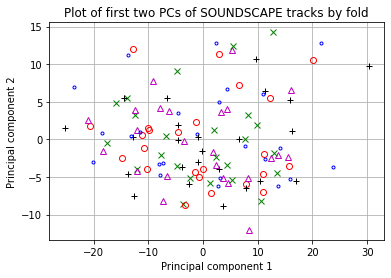

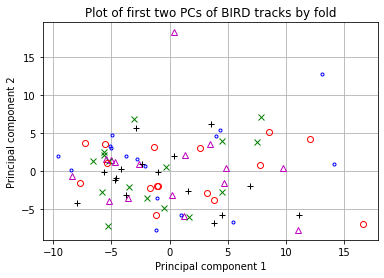

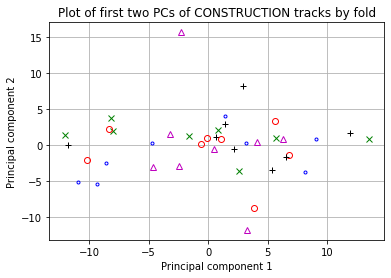

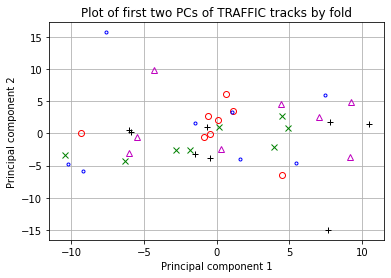

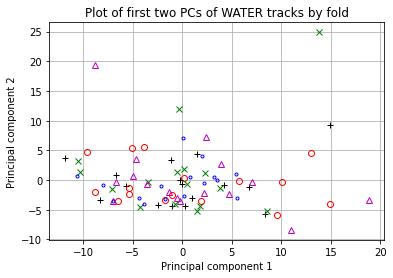

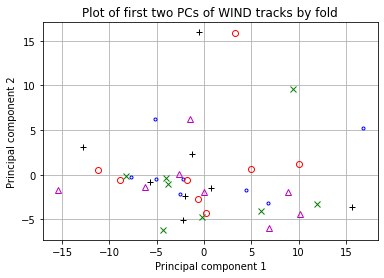

In [14]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

fstrings = ['b.','ro','k+','gx','m^'] # Each string corresponds to a label type for each fold.

for s, Y, F in zip(['SOUNDSCAPE','BIRD','CONSTRUCTION','TRAFFIC','WATER','WIND'],
                   [Ys, Yb, Yc, Yt, Ywa, Ywi],
                   [Fs, Fb, Fc, Ft, Fwa, Fwi]):
    plt.figure()
    plt.title(f'Plot of first two PCs of {s} tracks by fold')
    for idx, fold in enumerate(F):
        plt.plot(Y[idx,0],Y[idx,1],fstrings[fold-1], fillstyle='none') # Plot first two principal components of each transformed feature matrix
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.grid(which='both',axis='both')
    plt.show()

The graphs generated should be identical to the following six graphs:

<img src="../figures/fold_allocation_after_soundscape.png">
<img src="../figures/fold_allocation_after_bird.png">
<img src="../figures/fold_allocation_after_construction.png">
<img src="../figures/fold_allocation_after_traffic.png">
<img src="../figures/fold_allocation_after_water.png">
<img src="../figures/fold_allocation_after_wind.png">

## <a name="tsne_visualisation"> Make visualisation of soundscapes & maskers by performing t-SNE to two components

The next block performs the t-SNE visualisation, as an alternative to the principal components visualisation.

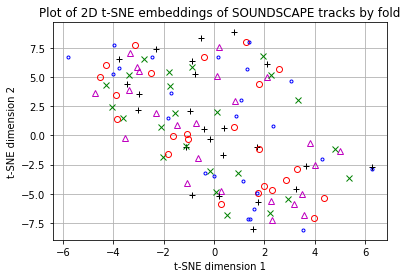

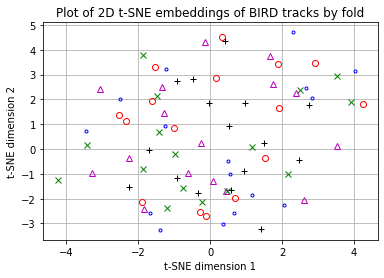

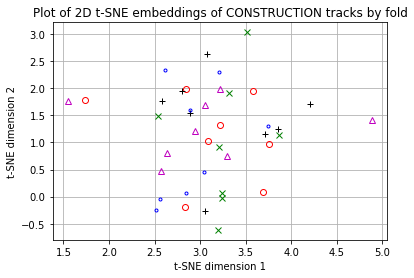

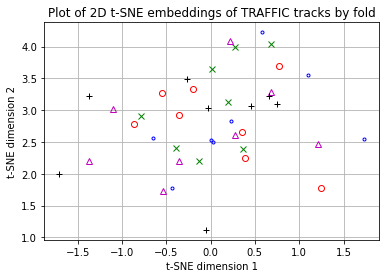

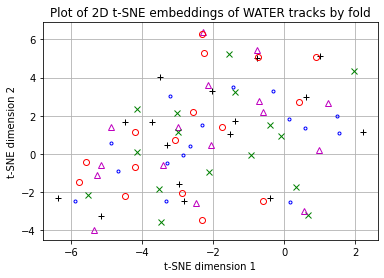

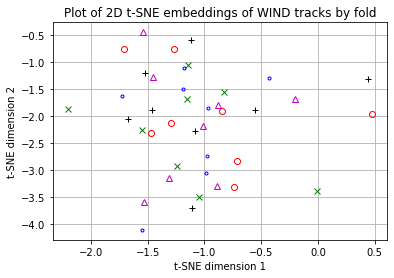

In [15]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'

np.random.seed(2021)
Ys_embedded  = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Ys )
Yb_embedded  = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Yb )
Yc_embedded  = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Yc )
Yt_embedded  = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Yt )
Ywa_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Ywa)
Ywi_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(Ywi)

fstrings = ['b.','ro','k+','gx','m^'] # Each string corresponds to a label type for each fold.

for s, Y, F in zip(['SOUNDSCAPE','BIRD','CONSTRUCTION','TRAFFIC','WATER','WIND'],
                   [Ys_embedded, Yb_embedded, Yc_embedded, Yt_embedded, Ywa_embedded, Ywi_embedded],
                   [Fs, Fb, Fc, Ft, Fwa, Fwi]):
    plt.figure()
    plt.title(f'Plot of 2D t-SNE embeddings of {s} tracks by fold')
    for idx, fold in enumerate(F):
        plt.plot(Y[idx,0],Y[idx,1],fstrings[fold-1], fillstyle='none') # Plot first two principal components of each transformed feature matrix
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.grid(which='both',axis='both')
    plt.show()

The graphs generated should be identical to the following six graphs:

<img src="../figures/fold_allocation_after_soundscape_tSNE.png">
<img src="../figures/fold_allocation_after_bird_tSNE.png">
<img src="../figures/fold_allocation_after_construction_tSNE.png">
<img src="../figures/fold_allocation_after_traffic_tSNE.png">
<img src="../figures/fold_allocation_after_water_tSNE.png">
<img src="../figures/fold_allocation_after_wind_tSNE.png">

Visually speaking, in terms of showing that the tracks in each fold are evenly distributed across the (principal component or t-SNE embedding) space, the results don't appear to differ much between the t-SNE visualisations and the projections to the first two components of the principal component space. Hence, we just went with the principal component one for the replication code. In addition, the t-SNE visualisation tends to suppress outliers and that may not be very desirable in our context because we indeed have maskers/soundscapes in each class that are particularly different from the rest (e.g. B2 aka `bird_10002.wav` in the test set is a very bad sounding bird), and it would be more reasonable to represent "outliers" as-is in the principal component space rather than suppressing them in the t-SNE visualisation.

Incidentally, the 2-dimensional t-SNE visualisation for the soundscape tracks appear to have the a similar downward (top left to bottom right corner) slant as the 2-dimensional heat maps for the Urban Soundscapes of the World recordings that we presented in the ARAUS dataset paper, so maybe the t-SNE inadvertently learned to elucidate ISO Pleasantness and ISO Eventfulness as the two embedding dimensions. This is just a conjecture though, and further investigation would be required to validate this claim.